# 1. Variables

## 1.1 Numerical Variables

There are only 2 types of variables you see – Continuous and Discrete. Further, discrete variables can divided into Nominal (categorical), Ordinal and Interval. If a variable can take any value between its minimum and maximum value, then it is called a continuous variable.

(Extra)
https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/

## 1.2 Categorical Variables

1. A categorical variable has too many levels. This pulls down performance level of the model.
2. A categorical variable has levels which rarely occur. Many of these levels have minimal chance of making a real impact on model fit.
3. There is one level which always occurs i.e. for most of the observations in data set there is only one level. Variables with such levels fail to make a positive impact on model performance due to very low variation.
4. If the categorical variable is masked, it becomes a laborious task to decipher its meaning.
5. You can’t fit categorical variables into a regression equation in their raw form. They must be treated.
6. Most of the algorithms (or ML libraries) produce better result with numerical variable.

## 1.3 Proven methods to deal with Categorical Variables

1. Convert to Number
    1. Label Encoder
    2. Convert numeric bins to number
2. Combine Levels - To avoid redundant levels in a categorical variable and to deal with rare levels, we can simply combine the different levels.
    1. Using Business Logic - It is one of the most effective method of combining levels. It makes sense also to combine similar levels into similar groups based on domain or business experience. For example, we can combine levels of a variable “zip code” at state or district level. This will reduce the number of levels and improve the model performance also.
    2. Using frequency - Combining levels based on business logic is effective but we may always not have the domain knowledge. In such cases, we combine levels by considering the frequency distribution or response rate.
        1. To combine levels using their frequency, we first look at the frequency distribution of of each level and combine levels having frequency less than 5% of total observation (5% is standard but you can change it based on distribution). This is an effective method to deal with rare levels.
3. One hot encoding

### 1.3.1 Categorical

A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.

### 1.3.2 Ordinal

An ordinal variable is similar to a categorical variable. The difference between the two is that there is a clear ordering of the variables.

### 1.3.3 Interval

An interval variable is similar to an ordinal variable, except that the intervals between the values of the interval variable are equally spaced.

### 1.3.4 Why does it matter whether a variable is categorical, ordinal or interval?

Statistical computations and analyses assume that the variables have a specific levels of measurement.  For example, it would not make sense to compute an average hair color.  An average of a categorical variable does not make much sense because there is no intrinsic ordering of the levels of the categories.  Moreover, if you tried to compute the average of educational experience as defined in the ordinal section above, you would also obtain a nonsensical result.  Because the spacing between the four levels of educational experience is very uneven, the meaning of this average would be very questionable.  In short, an average requires a variable to be interval. Sometimes you have variables that are “in between” ordinal and interval, for example, a five-point likert scale with values “strongly agree”, “agree”, “neutral”, “disagree” and “strongly disagree”.  If we cannot be sure that the intervals between each of these five values are the same, then we would not be able to say that this is an interval variable, but we would say that it is an ordinal variable.  However, in order to be able to use statistics that assume the variable is interval, we will assume that the intervals are equally spaced.

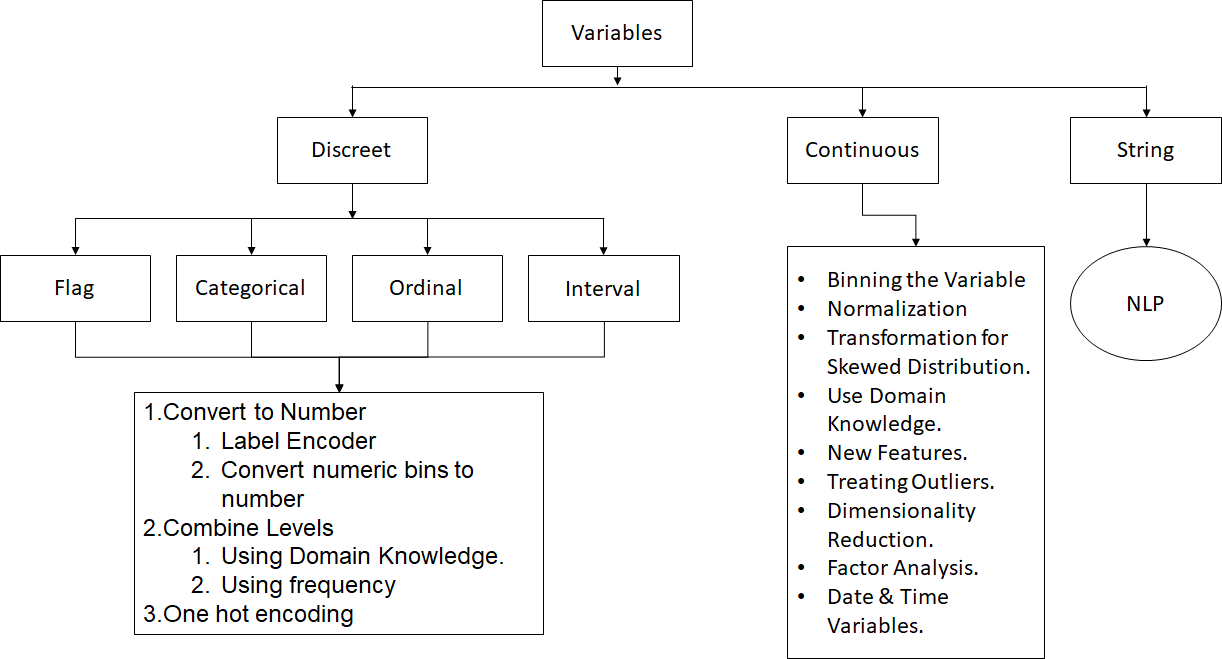

# 2. Data pre-processing

In [32]:
import pandas as pd

## 2.1 Read the Data

In [33]:
df = pd.read_csv('churn.csv')

## 2.2 Get a feel about the various fields/variables/columns/features of the Data

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## 2.3 Get the names of all the Fields/Variables of the Data

In [4]:
fields = df.columns.tolist()
fields

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

## 2.4 A sweet little algorithm for basic summarization/vizualization of the Data

https://www.hackerearth.com/blog/developers/descriptive-statistics-python-numpy/

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [6]:
def get_x_y_for_categorical_variable(y):
    categories = list(set(y))
    new_x = categories
    new_y = list()
    for x_val in new_x:
        freq = 0
        for y_val in y:
            if x_val == y_val:
                freq += 1
        new_y.append(freq)
    return new_x, new_y

In [7]:
def get_x_y_for_numerical_variable(y):
    new_x = list()
    new_y = y
    for idx, y_val in enumerate(new_y):
        new_x.append(idx)
    return new_x, new_y

Summarizing Categorical Variable: State


C:\Users\biswapratap.chatterj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


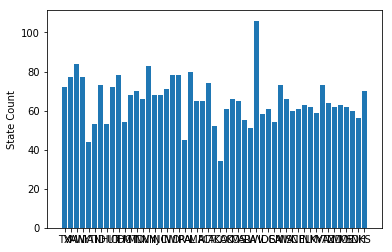

Summarizing Numerical Variable: Account Length


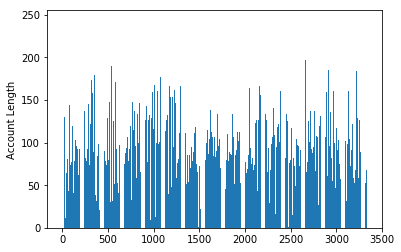

Summarizing Categorical Variable: Area Code


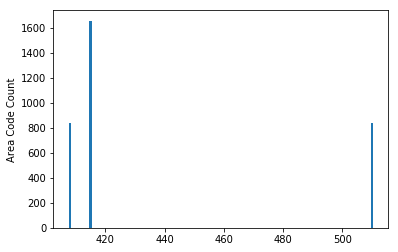

Summarizing Numerical Variable: Phone
could not convert string to float: '382-4657'
Summarizing Categorical Variable: Int'l Plan


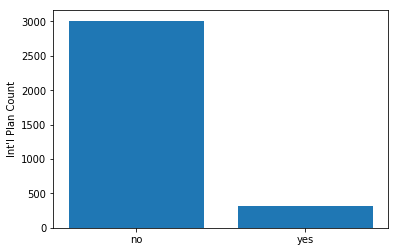

Summarizing Categorical Variable: VMail Plan


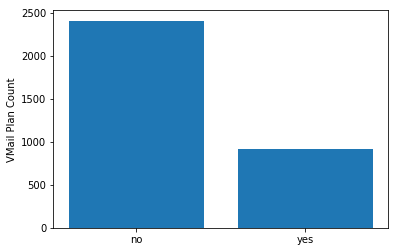

Summarizing Categorical Variable: VMail Message


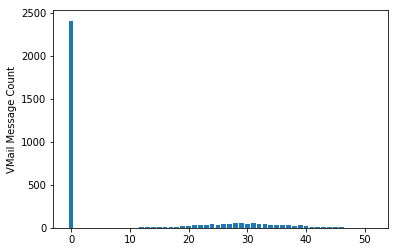

Summarizing Numerical Variable: Day Mins


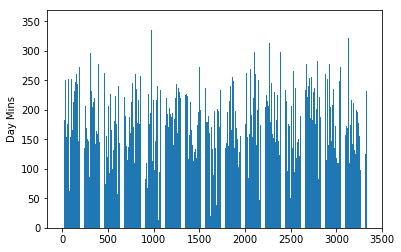

Summarizing Categorical Variable: Day Calls


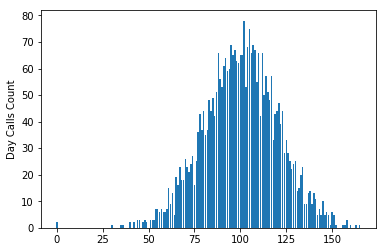

Summarizing Numerical Variable: Day Charge


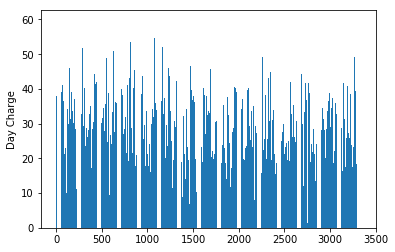

Summarizing Numerical Variable: Eve Mins


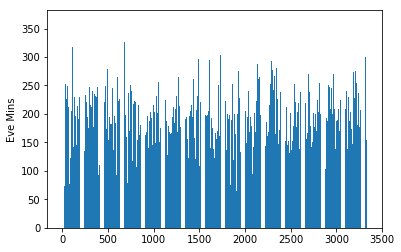

Summarizing Categorical Variable: Eve Calls


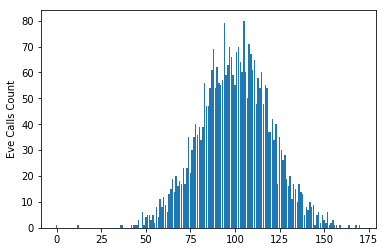

Summarizing Numerical Variable: Eve Charge


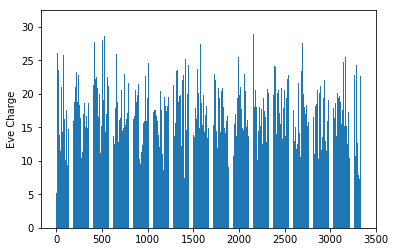

Summarizing Numerical Variable: Night Mins


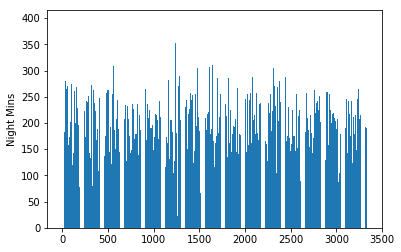

Summarizing Categorical Variable: Night Calls


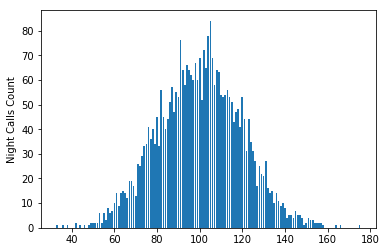

Summarizing Numerical Variable: Night Charge


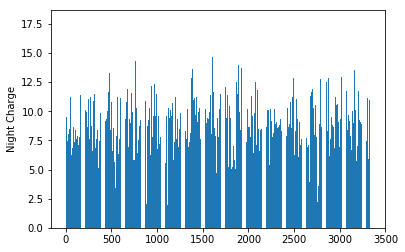

Summarizing Categorical Variable: Intl Mins


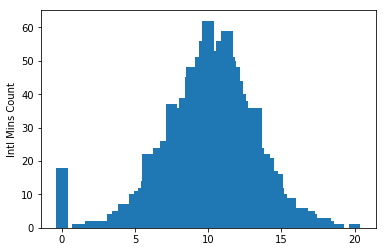

Summarizing Categorical Variable: Intl Calls


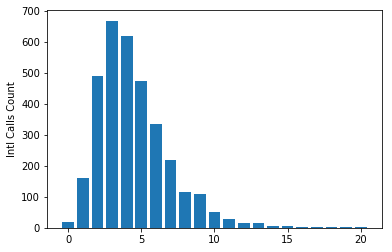

Summarizing Categorical Variable: Intl Charge


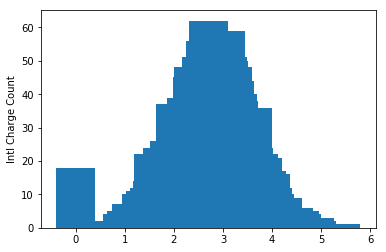

Summarizing Categorical Variable: CustServ Calls


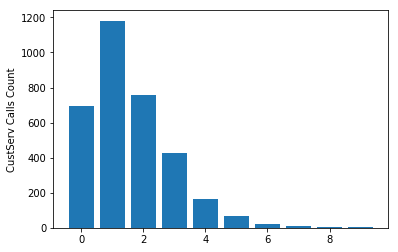

Summarizing Categorical Variable: Churn?


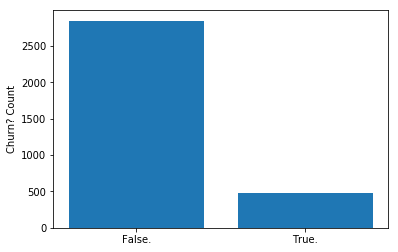

In [8]:
def get_min_max_range(y):
    try:
        min_val = min(y)
        max_val = max(y)
        range_val = max_val - min_val        
    except:
        min_val = 'NA'
        max_val = 'NA'
        range_val = 'NA'
    return min_val, max_val, range_val    
    
def get_mean(y):
    try:
        mean_val = np.mean(y)
    except:
        mean_val = 'NA'
    return mean_val

def get_median(y):
    try:
        median_val = np.median(y)
    except:
        median_val = 'NA'
    return median_val

def get_mode(y):
    try:
        mode_val = stats.mode(y)
    except:
        mode_val = 'NA'
    return mode_val[0]

def get_stddev(y):
    try:
        stddev_val = np.std(y)
    except:
        stddev_val = 'NA'
    return stddev_val

def get_P25(y):
    try:
        p25 = np.percentile(y, 25, interpolation='lower')
    except:
        p25 = 'NA'
    return p25

def get_P50(y):
    try:
        p50 = np.percentile(y, 50, interpolation='lower')
    except:
        p50 = 'NA'
    return p50

def get_P75(y):
    try:
        p75 = np.percentile(y, 75, interpolation='lower')
    except:
        p75 = 'NA'
    return p75

def get_IQR(y):
    try:
        IQR = stats.iqr(y, rng=(25, 75), interpolation='lower')
    except:
        IQR = 'NA'
    return IQR    

def get_skewness(y):
    try:
        skewness = stats.skew(y)
    except:
        skewness = 'NA'
    return skewness

def get_pearson_kurtosis(y):
    try:
        pearson_kurtosis = stats.kurtosis(y, fisher=False)
    except:
        pearson_kurtosis = 'NA'
    return pearson_kurtosis

def get_fisher_kurtosis(y):
    try:
        fisher_kurtosis = stats.kurtosis(y)
    except:
        fisher_kurtosis = 'NA'
    return fisher_kurtosis

def get_unique(y):
    try:
        unique = len(list(set(y)))
    except:
        unique = 'NA'
    return unique

def get_invalid(y):
    try:
        invalids = 0
        for y_v in y:
            if y_v is None or math.isnan(float(y_v)):
                invalids += 1
    except Exception as e:
        invalids = 'NA'
    return invalids

def check_for_non_numerical_values(y, f):
    a = 0
    b = 0
    c = 0
    try:
        t = [float(y_val) for y_val in y]
    except Exception as e:
        print(str(e))
        x = list()
        y = list()
        u = get_unique(y)
        ret = dict()
        ret['Field'] = f
        if u == 2:
            ret['Type'] = 'Flag'
        else:
            ret['Type'] = 'Categorical'
        ret['Min'] = 'NA'
        ret['Max'] = 'NA'
        ret['Range'] = 'NA'
        ret['Mean'] = 'NA'
        ret['Median'] = 'NA'
        ret['Mode'] = 'NA'
        ret['StdDev'] = 'NA'
        ret['P25'] = 'NA'
        ret['P50'] = 'NA'
        ret['P75'] = 'NA'
        ret['IQR'] = 'NA'
        ret['Skewness'] = 'NA'
        ret['PearsonKurtosis'] = 'NA'
        ret['FisherKurtosis'] = 'NA'
        ret['Unique'] = u
        ret['InValid'] = 'NA'
        a = x
        b = y
        c = ret
    return a, b, c

def summarize_variable(y, f, t=False):
    if t is True:
        new_x, new_y = get_x_y_for_categorical_variable(y)
    else:
        new_x, new_y = get_x_y_for_numerical_variable(y)
        
    a, b, c = check_for_non_numerical_values(new_y, f)
    
    if a == 0 and b == 0 and c == 0:
        ret = dict()
        u = get_unique(new_y)
        ret['Field'] = f
        if t is True:
            ret['Type'] = 'Numerical'
        elif u == 2:
            ret['Type'] = 'Flag'
        else:
            ret['Type'] = 'Categorical'
        ret['Min'], ret['Max'], ret['Range'] = get_min_max_range(y)
        ret['Mean'] = get_mean(y)
        ret['Median'] = get_median(y)
        ret['Mode'] = get_mode(y)
        ret['StdDev'] = get_stddev(y)
        ret['P25'] = get_P25(y)
        ret['P50'] = get_P50(y)
        ret['P75'] = get_P75(y)
        ret['IQR'] = get_IQR(y)
        ret['Skewness'] = get_skewness(y)
        ret['PearsonKurtosis'] = get_pearson_kurtosis(y)
        ret['FisherKurtosis'] = get_fisher_kurtosis(y)
        ret['Unique'] = get_unique(y)
        ret['InValid'] = get_invalid(y)
    else:
        new_x = a
        new_y = b
        ret = c
    
    return new_x, new_y, ret

def is_categorical(y, category_threshold_fraction):
    ret = False
    categories = list(set(y))
    num_of_uniques = len(categories)
    threshold = int(category_threshold_fraction * len(y))
    if num_of_uniques <= threshold:
        ret = True
    else:
        ret = False
    return ret

def summarize(fields, category_threshold_fraction):
    summary_df = pd.DataFrame(columns=['Field', 'Type', 'Min', 'Max', 'Range', 'Mean', 
                                   'Median', 'Mode', 'StdDev', 'P25', 'P50', 'P75', 'IQR', 'Skewness', 
                                   'PearsonKurtosis', 'FisherKurtosis', 'Unique', 'InValid'])
    for f in fields:
        y = df[f].tolist()
        if False == is_categorical(y, category_threshold_fraction):
            print("Summarizing Numerical Variable: " + str(f))
            x, y, ret = summarize_variable(y, f)
        else:
            print("Summarizing Categorical Variable: " + str(f))
            x, y, ret = summarize_variable(y, f, True)
            f = f + " Count"
        summary_df = summary_df.append(ret , ignore_index=True)
        if len(x) > 0 and len(y) > 0:
            plt.bar(x, y)
            plt.ylabel(f)
            plt.show()
    return summary_df
    
category_threshold_fraction = 0.05 # 5% of unique data in the feature/field/column
summary_df = summarize(fields, category_threshold_fraction)

## 2.5 Summary

In [9]:
summary_df

,Field,Type,Min,Max,Range,Mean,Median,Mode,StdDev,P25,P50,P75,IQR,Skewness,PearsonKurtosis,FisherKurtosis,Unique,InValid
0,State,Numerical,NA,NA,NA,NA,NA,[WV],NA,IL,MT,RI,NA,NA,NA,NA,51,NA
1,Account Length,Categorical,1,243,242,101.065,101,[105],39.8161,74,101,127,53,0.0965628,2.89053,-0.109474,212,0
2,Area Code,Numerical,408,510,102,437.182,415,[415],42.3649,408,415,510,102,1.12632,2.29363,-0.706374,3,0
3,Phone,Categorical,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
4,Int'l Plan,Numerical,NA,NA,NA,NA,NA,[no],NA,no,no,no,NA,NA,NA,NA,2,NA
5,VMail Plan,Numerical,NA,NA,NA,NA,NA,[no],NA,no,no,yes,NA,NA,NA,NA,2,NA
6,VMail Message,Numerical,0,51,51,8.09901,0,[0],13.6863,0,0,20,20,1.26425,2.94715,-0.0528515,46,0
7,Day Mins,Categorical,0,350.8,350.8,179.775,179.4,[154.0],54.4592,143.7,179.4,216.4,72.7,-0.029064,2.97829,-0.0217101,1667,0
8,Day Calls,Numerical,0,165,165,100.436,101,[102],20.0661,87,101,114,27,-0.111736,3.24102,0.241017,119,0
9,Day Charge,Categorical,0,59.64,59.64,30.5623,30.5,[26.18],9.25805,24.43,30.5,36.79,12.36,-0.0290702,2.97842,-0.0215817,1667,0


## 2.6 Identify few outliers

Outliers are extreme values that go against the trend of the remaining data. Identifying
outliers is important because they may represent errors in data entry. Also, even if an outlier
is a valid data point and not an error, certain statistical methods are sensitive to the presence
of outliers, and may deliver unreliable results.

One graphical method for identifying outliers for numeric variables is to examine a histogram of the variable.

In [10]:
day_calls = df['Day Calls'].tolist()
area_codes = df['Area Code'].tolist()

###  2.6.1 Using a histogram of the variable

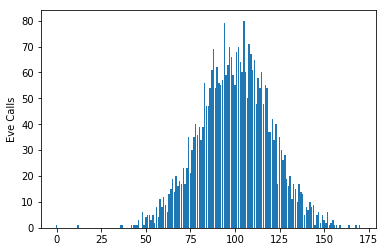

In [11]:
import matplotlib.pyplot as plt

y = eve_calls = df['Eve Calls'].tolist()
new_x, new_y = get_x_y_for_categorical_variable(y)
plt.bar(new_x, new_y)
plt.ylabel('Eve Calls')
plt.show()

### 2.6.2 Using two-dimensional scatter plots

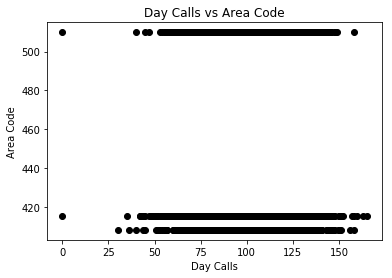

In [12]:
import matplotlib.pyplot as plt

plt.plot(day_calls, area_codes, 'o', color='black');
plt.title('Day Calls vs Area Code')
plt.xlabel('Day Calls')
plt.ylabel('Area Code')
plt.show()

## 2.7 Data	Transformation

Data transformation predominantly deals with normalizing also known as scaling data , handling skewness and aggregation of attributes. In statistics, data transformation is the application of a deterministic mathematical function to each point in a data set — that is, each data point zi is replaced with the transformed value yi = f(zi), where f is a function. Transforms are usually applied so that the data appear to more closely meet the assumptions of a statistical inference procedure that is to be applied, or to improve the interpretability or appearance of graphs. Nearly always, the function that is used to transform the data is invertible, and generally is continuous. The transformation is usually applied to a collection of comparable measurements.

Data miners should normalize their numeric variables, in order to standardize the scale of effect each variable has on the results. Neural networks benefit from normalization, as do algorithms that make use of distance measures, such as the k-nearest neighbors algorithm.

### 2.7.1 Min-Max Normalization

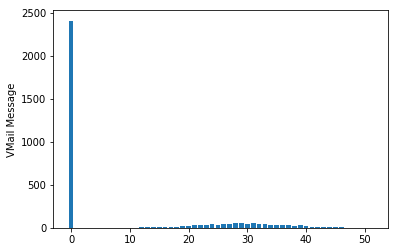

In [13]:
y = df['VMail Message'].tolist()
new_x, new_y = get_x_y_for_categorical_variable(y)
plt.bar(new_x, new_y)
plt.ylabel('VMail Message')
plt.show()

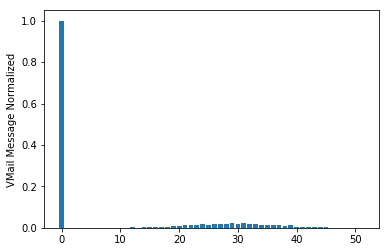

In [14]:
norm_data = list()

min_y = min(new_y)
max_y = max(new_y)
range_y = max_y - min_y

for y_val in new_y:
    norm_y = (y_val - min_y)/range_y
    norm_data.append(norm_y)

plt.bar(new_x, norm_data)
plt.ylabel('VMail Message Normalized')
plt.show()

### 2.7.2 Z-Score Standardization 

Data values that lie below the mean will have a negative Z-score standardization. Values falling exactly on the mean will have a Z-score standardization of zero. Data values that lie above the mean will have a positive Z-score standardization

Mean : 72.45652173913044


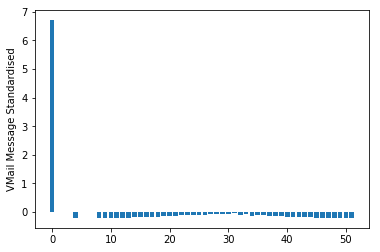

In [15]:
import numpy as np

norm_data = list()

mean_y = np.mean(new_y)
std_y = np.std(new_y)

for y in new_y:
    norm_y = (y - mean_y)/std_y
    norm_data.append(norm_y)

print("Mean : " + str(mean_y))
plt.bar(new_x, norm_data)
plt.ylabel('VMail Message Standardised')
plt.show()

### 2.7.3 Decimal Scaling

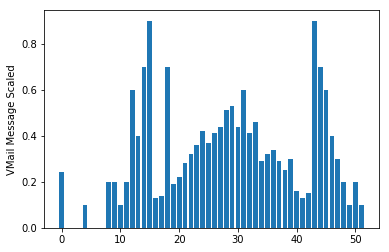

In [16]:
norm_data = list()

for y in new_y:
    y_t = y
    count = 0
    while(y_t > 0):
        count = count + 1
        y_t = y_t//10
    y_norm = y/pow(10,count)
    norm_data.append(y_norm)

plt.bar(new_x, norm_data)
plt.ylabel('VMail Message Scaled')
plt.show()

## 2.8 Transformations to Achieve Normality

Normal distribution is a continuous probability distribution commonly known as the bell curve, which is symmetric. It is centred at mean µ (“mew”) and has its spread determined by SD δ (sigma).

The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve. Actually many of the algorithms in data assume that the data science is normal and calculate various stats assuming this. So the more the data is close to normal the more it fits the assumption. Because data science is just statistics at the end of the day, and one of the key assumptions of statistics is the Central Limit Theorem.

The central limit theorem states that in many situations, the sample mean does vary normally if the sample size is reasonably large. However, if the population is substantially skewed and the sample size is at most moderate, the approximation provided by the central limit theorem can be poor, and the resulting confidence interval will likely have the wrong coverage probability. Thus, when there is evidence of substantial skew in the data, it is common to transform the data to a symmetric distribution before constructing a confidence interval. If desired, the confidence interval can then be transformed back to the original scale using the inverse of the transformation that was applied to the data.

### 2.8.1 Skewness of Data

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

Transformation is required when we encounter highly skewed data. It is suggested not to work on skewed data in its raw form. Because, it reduces the impact of low frequency values which could be equally significant. At times, skewness is influenced by presence of outliers. Hence, we need to be careful while using this approach.

In [17]:
y = eve_calls = df['Eve Calls'].tolist()
new_x, new_y = get_x_y_for_categorical_variable(y)

mean_val = np.mean(new_y)
median_val = np.median(new_y)
stddev_val = np.std(new_y)

skewness = 3 * (mean_val - median_val) / stddev_val
skewness

1.2599489873451395

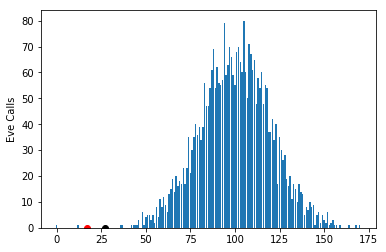

In [18]:
plt.plot(mean_val, 0, 'o', color='black');
plt.plot(median_val, 0, 'o', color='red');
plt.bar(new_x, new_y)
plt.ylabel('Eve Calls')
plt.show()

For right-skewed data, the mean is greater than the median, and thus the skewness will be positive, while for left-skewed data, the mean is smaller than the median, generating negative values for skewness. For perfectly symmetric (and unimodal) data of course, the mean, median, and mode are all equal, and so the skewness equals zero.

So 1.2599489873451395 is a right skewed data

### 2.8.2 How to make our data “more normally distributed”?

Make data more normally distributed --> make it more symmetric --> eliminate the skewness as much as possible --> achieved by applying one of the transformations below to the data.
Transformations:
1. (Better) Natural log transformation, ln(weight)
2. (Good) Square root transformation, √𝑤𝑒𝑖𝑔ℎ𝑡
3. (Best) Inverse square root transformation. 1/√𝑤𝑒𝑖𝑔ℎ𝑡

### 2.8.3 Natural Log Transformation

In [19]:
new_y_logged = np.log(new_y)
mean_val = np.mean(new_y_logged)
median_val = np.median(new_y_logged)
stddev_val = np.std(new_y_logged)

skewness = 3 * (mean_val - median_val) / stddev_val
skewness

-0.4808920442895802

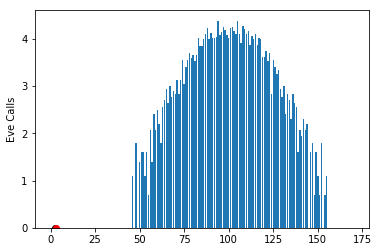

In [20]:
plt.plot(mean_val, 0, 'o', color='black');
plt.plot(median_val, 0, 'o', color='red');
plt.bar(new_x, new_y_logged)
plt.ylabel('Eve Calls')
plt.show()

### 2.8.4 Square root transformation

In [21]:
import math

new_y_sqrt = list()
for yv in new_y:
    new_y_sqrt.append(math.sqrt(yv))
mean_val = np.mean(new_y_sqrt)
median_val = np.median(new_y_sqrt)
stddev_val = np.std(new_y_sqrt)

skewness = 3 * (mean_val - median_val) / stddev_val
skewness

0.5010120036186352

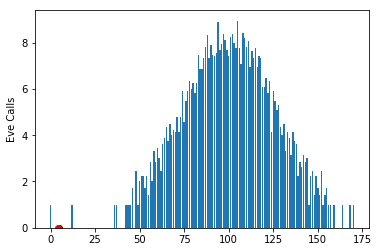

In [22]:
plt.plot(mean_val, 0, 'o', color='black');
plt.plot(median_val, 0, 'o', color='red');
plt.bar(new_x, new_y_sqrt)
plt.ylabel('Eve Calls')
plt.show()

### 2.8.5 Inverse square root transformation

In [23]:
def numpy_isqrt(number):
    if number != 0:
        return 1/math.sqrt(number)
    else:
        return 0
    #threehalfs = 1.5
    #x2 = number * 0.5
    #y = np.float32(number)
    #i = y.view(np.int32)
    #i = np.int32(0x5f3759df) - np.int32(i >> 1)
    #y = i.view(np.float32)
    #y = y * (threehalfs - (x2 * y * y))
    #return float(y)

new_y_inv_sqrt = list()
for yv in new_y:
    new_y_inv_sqrt.append(numpy_isqrt(yv))
mean_val = np.mean(new_y_inv_sqrt)
median_val = np.median(new_y_inv_sqrt)
stddev_val = np.std(new_y_inv_sqrt)

skewness = 3 * (mean_val - median_val) / stddev_val
skewness

1.186800442427366

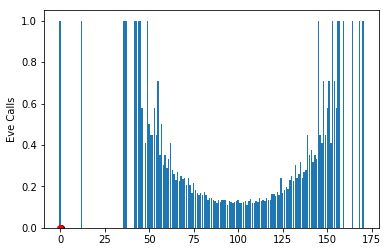

In [24]:
plt.plot(mean_val, 0, 'o', color='black');
plt.plot(median_val, 0, 'o', color='red');
plt.bar(new_x, new_y_inv_sqrt)
plt.ylabel('Eve Calls')
plt.show()

### 2.8.6 Normal Probability Plot

To check for normality, we construct a normal probability plot, which plots the quantiles of a particular distribution against the quantiles of the standard normal distribution. Similar to a percentile, the pth quantile of a distribution is the value xp such that p% of the distribution values are less than or equal to xp. In a normal probability plot, if the distribution is normal, the bulk of the points in the plot should fall on a straight line; systematic deviations from linearity in this plot indicate nonnormality. Finally, when the algorithm is done with its analysis, don't forget to “de-transform” the data.

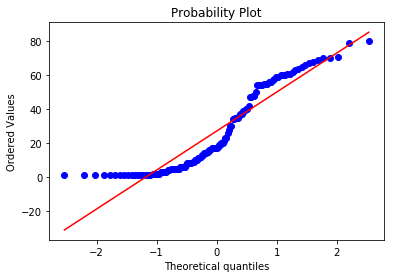

In [25]:
from scipy import stats

res = stats.probplot(new_y, plot=plt)

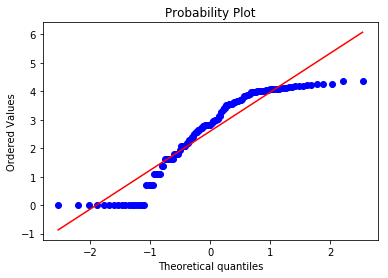

In [26]:
res = stats.probplot(new_y_logged, plot=plt)

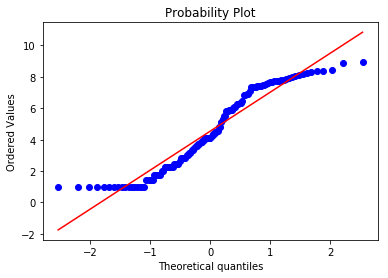

In [27]:
res = stats.probplot(new_y_sqrt, plot=plt)

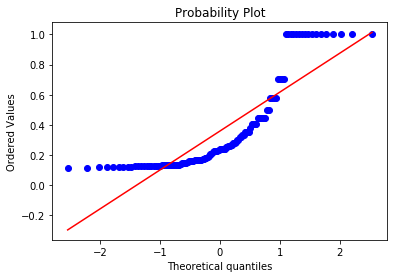

In [28]:
res = stats.probplot(new_y_inv_sqrt, plot=plt)

## 2.9 More on identifying outliers

### 2.9.1 Z-score method

1. A data value is an outlier if it has a Z-score that is either less than or greater than 3.
2. Variable values with Z-scores much beyond this range may bear further investigation, in order to verify that they do not represent data entry errors or other issues. However, one should not automatically omit outliers from analysis.
3. Not Robust: Unfortunately, the mean and SD, which are both part of the formula for the Z-score standardization, are both rather sensitive to the presence of outliers.

In [29]:
data = df['Eve Charge'].tolist()
norm_data = list()

mean_y = np.mean(data)
std_y = np.std(data)

for y in data:
    norm_y = (y - mean_y)/std_y
    norm_data.append(norm_y)

print("Min Z-score : " + str(min(norm_data)))
print("Max Z-score : " + str(max(norm_data)))

Min Z-score : -3.96367920999539
Max Z-score : 3.207979699219934


So the above Z-scores calls for a need of further investigation of the Eve Charge data for possible outliers.

### 2.9.2 IRQ Method

A robust measure of outlier detection is therefore defined as follows. A data value is an  outlier if
1. it is located 1.5(IQR) or more below Q1, or
2. it is located 1.5(IQR) or more above Q3.

In [30]:
p25 = np.percentile(data, 25, interpolation='lower')
p25

14.16

In [31]:
p75 = np.percentile(data, 75, interpolation='lower')
p75

20.0

In [32]:
IQR = stats.iqr(data, rng=(25, 75), interpolation='lower')
IQR

5.84

A test score would be robustly identified as an outlier if
1. it is lower than p25 − 1.5(IQR) = 14.16 − 1.5(5.84) = 5.4, or
2. it is higher than p75 + 1.5(IQR) = 20.0 + 1.5(5.84) = 28.76.

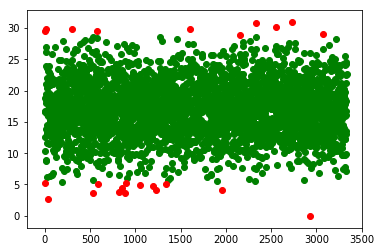

In [33]:
outliers = list()
x_outliers = list()
non_outliers = list()
x_non_outliers = list()
for idx, d in enumerate(data):
    if d < (p25 - (1.5 * IQR)) or d > (p75 + (1.5 * IQR)):
        outliers.append(d)
        x_outliers.append(idx)
    else:
        non_outliers.append(d)
        x_non_outliers.append(idx)

plt.scatter(x_non_outliers, non_outliers, color='green')
plt.scatter(x_outliers, outliers, color='red')
plt.show()

## 2.10 Binning Numerical Variables

Some algorithms prefer categorical rather than continuous predictors, in which case we would need to partition any numerical predictors into bins or bands. Data binning. Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall in a given small interval, a bin, are replaced by a value representative of that interval, often the central value. Binning refers to dividing a list of continuous variables into groups. It is done to discover set of patterns in continuous variables, which are difficult to analyze otherwise. Also, bins are easy to analyze and interpret. But, it also leads to loss of information and loss of power. Once the bins are created, the information gets compressed into groups which later affects the final model. Hence, it is advisable to create small bins initially. This would help in minimal loss of information and produces better results. However, I’ve encountered cases where small bins doesn’t prove to be helpful. In such cases, you must decide for bin size according to your hypothesis.We should consider distribution of data prior to deciding bin size.

1. Equal width binning
    1. k categories of equal width
    2. Equal width binning is not recommended for most data mining applications, as the width of the categories can be greatly affected by the presence of outliers.
2. Equal frequency binning
    1. k categories, each having k/n records
    2. Binning by clustering 
3. k-means clustering , optimal partitioning
4. Binning based on predictive value
    1. Methods (1)–(3) ignore the target variable; binning based on predictive value partitions the numerical predictor based on the effect each partition has on the value of the target variable.

### 2.10.1 Equal Width Binning

In [34]:
def get_equal_width_bins(data, n):
    categorical_object = pd.cut(data, n)
    x = list()
    y = list()
    for index, d in enumerate(data):
        x.append(d)
        y.append(str(categorical_object[index]))
    return y

In [35]:
y = get_equal_width_bins(data, 7)

In [36]:
new_x, new_y = get_x_y_for_categorical_variable(y)

In [37]:
print(new_x)

['(22.079, 26.494]', '(8.831, 13.247]', '(-0.0309, 4.416]', '(4.416, 8.831]', '(13.247, 17.663]', '(26.494, 30.91]', '(17.663, 22.079]']


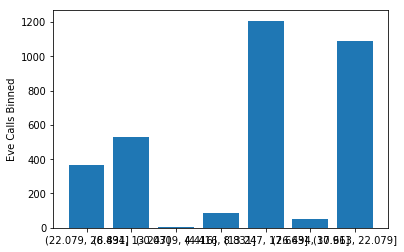

In [38]:
plt.bar(new_x, new_y)
plt.ylabel('Eve Calls Binned')
plt.show()

### 2.10.2 Equal Frequency Binning

In [39]:
def get_equal_frequency_bins(data, n):
    bins = pd.qcut(data, n)
    x = list()
    y = list()
    for index, d in enumerate(data):
        x.append(d)
        y.append(str(bins[index]))
    return y

In [40]:
y = get_equal_frequency_bins(data, 5)

In [41]:
new_x, new_y = get_x_y_for_categorical_variable(y)

In [42]:
print(new_x)

['(-0.001, 13.514]', '(20.77, 30.91]', '(15.98, 18.144]', '(18.144, 20.77]', '(13.514, 15.98]']


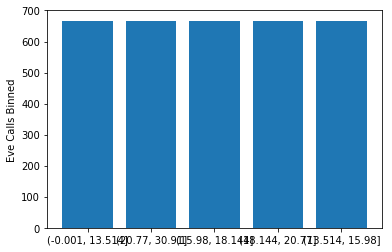

In [43]:
plt.bar(new_x, new_y)
plt.ylabel('Eve Calls Binned')
plt.show()

### 2.10.3 Binning by Clustering (K-Means)

In [44]:
from sklearn.cluster import KMeans

def get_clustered_bins(data, n):
    data_array = list()
    for d in data:
        data_array.append([d])
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data_array)
    x = list()
    y = list()
    for index, d in enumerate(data):
        x.append(d)
        l = kmeans.labels_[index]
        c = str(kmeans.cluster_centers_[l])
        y.append(c)
    return y

In [45]:
y = get_clustered_bins(data, 5)

In [46]:
new_x, new_y = get_x_y_for_categorical_variable(y)

In [47]:
print(new_x)

['[9.56432353]', '[24.56479412]', '[17.25988247]', '[13.8105075]', '[20.57449673]']


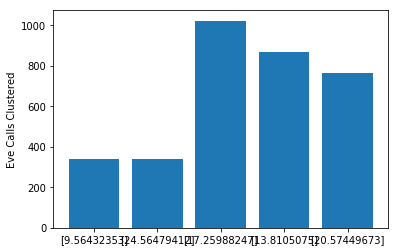

In [48]:
plt.bar(new_x, new_y)
plt.ylabel('Eve Calls Clustered')
plt.show()

## 2.11 Reclassifying Categorical Variables

Reclassifying categorical variables is the categorical equivalent of binning numerical variables. Often, a categorical variable will contain too many easily analyzable field values. Thus, instead of 50 different field values, the analyst (and algorithm) is faced with only 5. Alternatively, the 50 states could be reclassified as the variable economic_level, with three field values containing the richer states, the midrange states, and the poorer states. The data analyst should choose a reclassification that supports the objectives of the business problem or research question.

## 2.12 Removable Variables

1. Unary variables and
    1. Unary variables take on only a single value, so a unary variable is not so much a variable as a constant.
2. Variables that are very nearly unary.

## 2.13 Unremovable Variables

1. Variables for which 90% or more of the values are missing.
    1. Consider that there may be a pattern in the missingness.
    2. Consider the missing values occurring due to some systematic but unobserved phenomenon.
    3. It is strongly recommended that the inferencing is be based on the regression or decision tree methods
2. Variables that are strongly correlated.
    1. An example of correlated variables may be precipitation and attendance at a state beach. As precipitation increases, attendance at the beach tends to decrease, so that the variables are negatively correlated.12 Inclusion of correlated variables may at best double-count a particular aspect of the analysis, and at worst lead to instability of the model results.
    2. It is suggested that principal components analysis be applied, where the common variability in correlated predictors may be translated into a set of uncorrelated principal components

## 2.14 Duplicate Records

Duplicate records lead to an overweighting of the data values in those records, so, if the records are truly duplicate, only one set of them should be retained.

## 2.15 ID Fields

ID fields have a different value for each record, so they will not be helpful for your downstream data mining algorithms. They may even be hurtful, with the algorithm finding some spurious relationship between ID field and your target. Thus, it is recommended that ID fields should be filtered out from the data mining algorithms, but should not be removed from the data, so that the data analyst can differentiate between similar records.

# 3 Exploratory Data Analysis (EDA) or Graphical Data Analysis

1. A data mining analyst may already have some a priori hypotheses that he or she would like to test regarding the relationships between the variables, using hypothesis testing procedures.
2. "BUT" Analysts do not always have a priori notions of the expected relationships among the variables especially when confronted with unknown, large databases.
3. Examine the interrelationships among the attributes;
4. Identify interesting subsets of the observations;
5. Develop an initial idea of possible associations amongst the predictors, as well as between the predictors and the target variable.
6. One of the primary reasons for performing EDA is to investigate the variables, examine the distributions of the categorical variables, look at the histograms of the numeric variables, and explore the relationships among sets of variables. 

## 3.1 EDA Case Study

1. Our task is to identify patterns in the data that will help to reduce the proportion of “churners”.
2. Our overall objective for this data mining project as a whole (not just the EDA phase) is to develop a model of the type of customer most likely to churn.
3. As a first step we just need to see first 10/20 records of the data and get a feel about the various fields/variables and to pin point the variables that are relevant for our objective.
4. As per whatever data we already have, the bar graph shows the counts and percentages of customers who churned (true) and who did not churn (false), so we get an idea of the severity of the problem we are about to solve.
5. We need to see which variables are associated with “the churning behaviour”.

## 3.2 Target Variable or Variable of Point on Interest

Direct variable associated with our task or goal i.e. "Identify patterns that will help to reduce the proportion of the "churners" - Churn? (Categorical/Flag Variable)

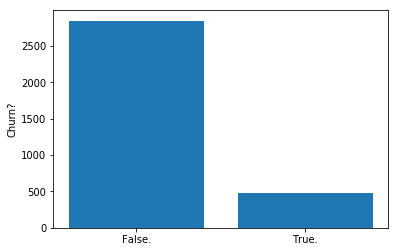

In [49]:
y = df['Churn?'].tolist()
x, churn_y = get_x_y_for_categorical_variable(y)
plt.bar(x, churn_y)
plt.ylabel('Churn?')
plt.show()

## 3.3 Building the Variable-to-Variable Interaction Table (V2VI Table)

## 3.3.1 Categorical Variables 

### 3.3.1.1 Overlay Bar Charts

A bar chart of the International Plan, with an overlay of churn, represents a comparison of the proportion of churners and non-churners, among customers who either had selected the International Plan or had not selected it.

In [50]:
def proportionally_scale_smaller_ys(ylist1, ylist2):
    y1_max = max(ylist1)
    y1_max_idx = ylist1.index(y1_max)
    y2_max = max(ylist2)
    y2_max_idx = ylist2.index(y2_max)
    
    not_to_scale_index = 0
    scale_to_value = 0
    
    scale_to_value = y1_max
    not_to_scale_index = y1_max_idx
        
    scaled_ylist1 = list()
    scaled_ylist2 = list()

    for i in range(0, len(ylist1), 1):
        y1 = ylist1[i]
        y2 = ylist2[i]
        if i != not_to_scale_index:
            fraction = float(y2 / y1)
            y2 = fraction * scale_to_value
            y1 = scale_to_value
        scaled_ylist1.append(y1)
        scaled_ylist2.append(y2)
        
    return scaled_ylist1, scaled_ylist2

In [51]:
def overlay_bar_chart(variable_1, 
                      variable_2, 
                      x_axis_param_dict,
                      scale=False):
    width = 0.8

    y = df[variable_1].tolist()
    intl_plan_x, intl_plan_y = get_x_y_for_categorical_variable(y)

    churn = df[variable_2].tolist()
    churn = [x_axis_param_dict[c] for c in churn]
    y = churn
    churn_x, churn_y = get_x_y_for_categorical_variable(y)
        
    if scale:
        intl_plan_y, churn_y = proportionally_scale_smaller_ys(intl_plan_y, churn_y)
        
    plt.bar(intl_plan_x, intl_plan_y, width=width, color='b', label=variable_1)
    plt.bar(churn_x, churn_y, width=width*0.8, alpha=0.5, color='r', label=variable_2)

    plt.legend()
    plt.show()

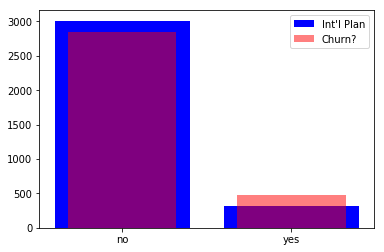

In [52]:
x_axis_param_dict = dict()
x_axis_param_dict['False.'] = 'no'
x_axis_param_dict['True.'] = 'yes'
overlay_bar_chart('Int\'l Plan', 'Churn?', x_axis_param_dict)

The graphic appears to indicate that a greater proportion of International Plan holders are churning, but it is difficult to be sure. In order to “increase the contrast” and better discern whether the proportions differ, generate same size bars for each category i.e. bar for the yes category has been “stretched” out to be the same length as for the no category.

### 3.3.1.2 Scaled Overlay Bar Charts

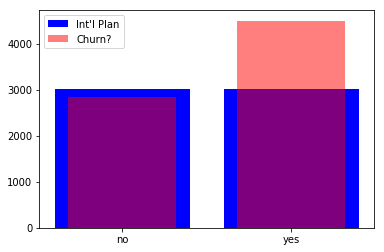

In [53]:
overlay_bar_chart('Int\'l Plan', 'Churn?', x_axis_param_dict, scale=True)

Here what we are showing is for the equal number of International Plan holders and non-holders the churners will be high for those who hold the plan. But they do not quantify the relationship.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('churn.csv')
df.shape

(3333, 21)

### 3.3.1.3 Contingency Table

A contingency table summarizes the conditional frequencies of two attributes and shows how these two attributes are dependent on each other with the information on a partition of universe generated by these attributes. Mainly, in statistical analysis, this table is used to check statistical independence of two attributes.

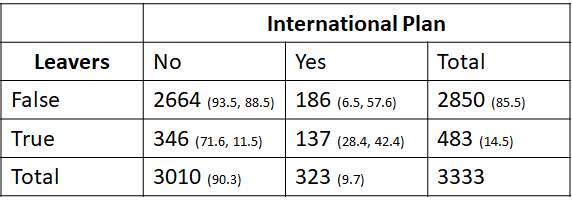

### 3.3.1.4 Conditional Distribution

The conditional distributions describe the distribution of one variable given the levels of the other variable. The cells of the contingency table divided by the row or column totals provide the conditional distributions. The sum of a conditional distribution is 1 or 100%.

#### Q. What is the probability than a randomly chosen customer will churn, given he/she has opted for the International Plan?

A. The term "given" highlights that its a "Conditional Probability". The variable that follows the given word is the condition, so for this example we look at the 3rd column (International Plan --> Yes). This condition is fixed. So what is our sample space count for this given condition? It's 323 and what probability do we want? Its customers who will churn i.e. 137. So the conditional probability is - 137/323 = 42.4%.

#### Q. What is the probability than a randomly chosen customer will churn, given he/she has not opted for the International Plan?

A. 346/3010 = 11.5%.

#### Q. Same way, What is the probability than a randomly chosen customer will have opted for an international plan, given he/she has has not churned?

A. 186/2850 = 6.5%

### 3.3.1.5 Marginal Distribution

1. The distribution must be from bivariate data. Bivariate is just another way of saying “two variables,” like X and Y.
2. A marginal distribution is where you are only interested in one of the random variables . In other words, either X or Y. If you look at the probability table above, the sum probabilities of one variable are listed in the bottom row and the other sum probabilities are listed in the right column. So this table has two marginal distributions.

#### Q. What is the probability than a randomly chosen customer will churn?

A. Notice, no word "given" now. So irrespective of whether a customer opts for the international plan or not, what is the probability than a randomly chosen customer will churn? Look at the last column - 

483/3333 = 14.5%

So opting for the int'l plan increases the chances of the customer churning to 137/323 = 42.4% i.e. almost 3 times.

### 3.3.1.6 Clustured Bar Chart

### (Example) Clustered Bar Chart - 2 Categorical Variables

In [35]:
def __count__(s):
    s = list(s)
    cols = list(set(s))
    v = 0
    df_dict = dict()
    for c in cols:
        df_dict[c] = [v]
    for x in s:
        for c in cols:
            if x == c:
                k = df_dict.get(c)
                k[0] += 1
    df_t = pd.DataFrame.from_dict(df_dict)
    return df_t

In [18]:
def generate_df_for_clustered_bar_chart(variables):
    sub_df = df[variables]
    sub_df = sub_df.groupby(variables[:-1])[variables[-1]].apply(lambda s: __count__(s))
    sub_df = sub_df.reset_index()
    drop_cols = list()
    for col in sub_df.columns:
        if 'level' in col or 'index' in col:
            drop_cols.append(col)
    sub_df = sub_df.drop(drop_cols, axis=1)
    return sub_df

In [19]:
df_2_on_1 = generate_df_for_clustered_bar_chart(["Int'l Plan", "Churn?"])
df_1_on_2 = generate_df_for_clustered_bar_chart(["Churn?", "Int'l Plan"])

In [20]:
df_2_on_1

,Int'l Plan,True.,False.
0,no,346,2664
1,yes,137,186


In [21]:
df_1_on_2

,Churn?,no,yes
0,False.,2664,186
1,True.,346,137


In [22]:
def cluster_bar_chart(df):
    colors = ['red', 'blue', 'green', 'brown']
    pos = list(range(df.shape[0]))
    width = 0.25
    
    fig, ax = plt.subplots(figsize=(10,5))

    cols = list(df)
    lbl = '\n'.join(cols[:-2])
    c = 0
    for col in cols[1:]:
        plt.bar([p + width*c for p in pos], 
                df[col], 
                width, 
                alpha=0.5, 
                color=colors[c], 
                label=lbl)
        c += 1

    ax.set_ylabel('Count')
    ax.set_xlabel(lbl)
    ax.set_xticks([p + ((len(cols[2:]) - 1) * 1 + 0.5) * width for p in pos])
    x_ticks_label = list()
    for index, row in df.iterrows():
        x_tick_lbl = ""
        for c in cols[:-2]:
            x_tick_lbl = x_tick_lbl + str(row[c]) + '\n'
        x_ticks_label.append(x_tick_lbl)
    ax.set_xticklabels(x_ticks_label)
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.legend(cols[1:], loc='upper left')
    plt.grid()
    plt.show()

In [23]:
def scale_clustered_bar_chart_df(df):
    df_local = df.copy()
    max_scale_val = max(df_local[df_local.columns[-2]].tolist())
    list_minus_2 = df_local[df_local.columns[-2]].tolist()
    list_minus_1 = df_local[df_local.columns[-1]].tolist()
    scaled_list_minus_2 = list()
    scaled_list_minus_1 = list()
    for v_minus_2, v_minus_1 in zip(list_minus_2, list_minus_1):
        new_v_minus_2 = max_scale_val
        frac = float(v_minus_1 / v_minus_2)
        new_v_minus_1 = frac * float(max_scale_val)
        scaled_list_minus_2.append(new_v_minus_2)
        scaled_list_minus_1.append(new_v_minus_1)
    df_local[df_local.columns[-2]] = scaled_list_minus_2
    df_local[df_local.columns[-1]] = scaled_list_minus_1
    return df_local  

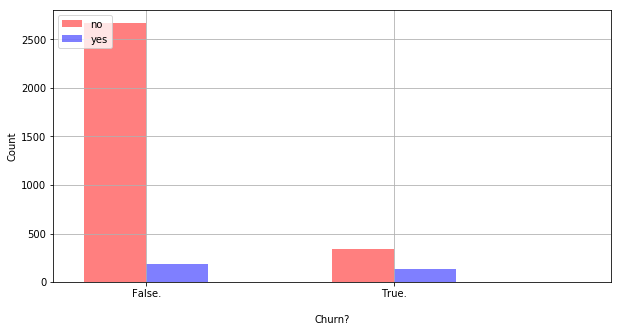

In [24]:
cluster_bar_chart(df_1_on_2)

In [25]:
df_1_on_2

,Churn?,no,yes
0,False.,2664,186
1,True.,346,137


In [26]:
scaled_df_1_on_2 = scale_clustered_bar_chart_df(df_1_on_2)
scaled_df_1_on_2

,Churn?,no,yes
0,False.,2664,186.000000
1,True.,2664,1054.820809


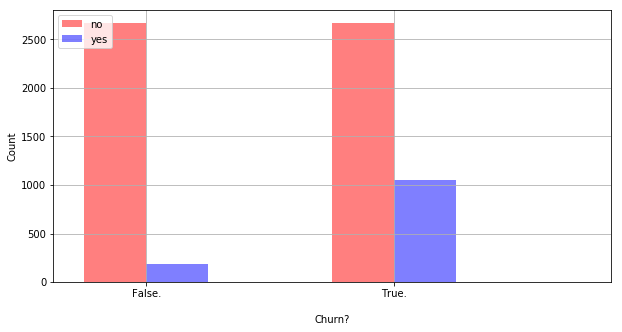

In [27]:
cluster_bar_chart(scaled_df_1_on_2)

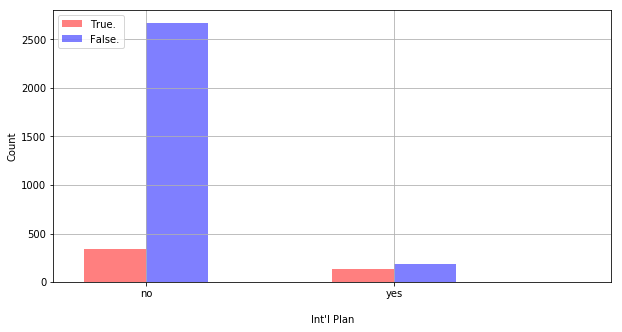

In [28]:
cluster_bar_chart(df_2_on_1)

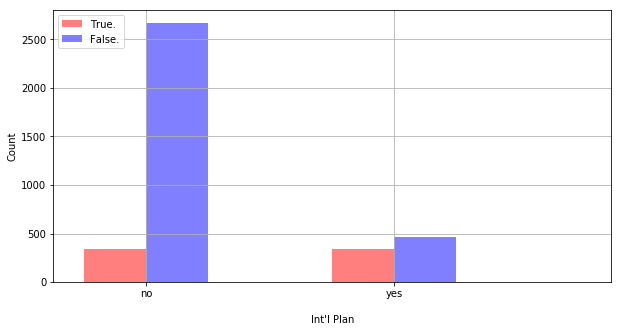

In [29]:
scaled_df_2_on_1 = scale_clustered_bar_chart_df(df_2_on_1)
cluster_bar_chart(scaled_df_2_on_1)

### (Example) Multilayered Clustered Bar Chart - 3 Categorical Variables

In [30]:
vmp_ip_c_df = generate_df_for_clustered_bar_chart(["VMail Plan", "Int'l Plan", "Churn?"])

In [31]:
vmp_ip_c_df

,VMail Plan,Int'l Plan,True.,False.
0,no,no,302,1878
1,no,yes,101,130
2,yes,no,44,786
3,yes,yes,36,56


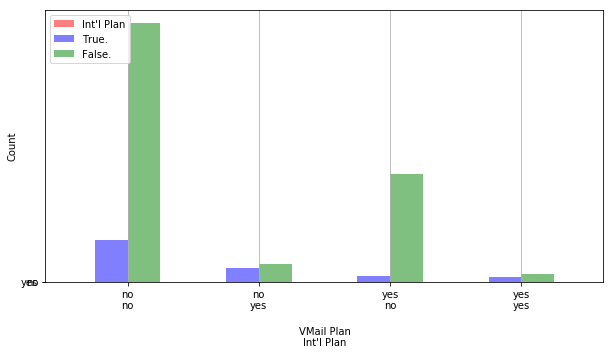

In [27]:
cluster_bar_chart(vmp_ip_c_df)

In [80]:
vmp_ip_c_df

,VMail Plan,Int'l Plan,True.,False.
0,no,no,302,1878
1,no,yes,101,130
2,yes,no,44,786
3,yes,yes,36,56


In [81]:
scaled_vmp_ip_c_df = scale_clustered_bar_chart_df(vmp_ip_c_df)
scaled_vmp_ip_c_df

,VMail Plan,Int'l Plan,True.,False.
0,no,no,302,1878.000000
1,no,yes,302,388.712871
2,yes,no,302,5394.818182
3,yes,yes,302,469.777778


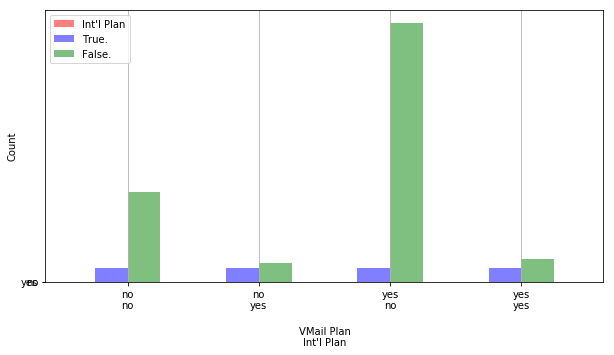

In [82]:
cluster_bar_chart(scaled_vmp_ip_c_df)

### (Example) Multilayered Clustered Bar Chart - 4 Categorical Variables

In [28]:
dc_vmp_ip_c_df = generate_df_for_clustered_bar_chart(["CustServ Calls", "VMail Plan", "Int'l Plan", "Churn?"])

In [29]:
dc_vmp_ip_c_df

,CustServ Calls,VMail Plan,Int'l Plan,True.,False.
0,0,no,no,52.0,395.0
1,0,no,yes,27.0,30.0
2,0,yes,no,1.0,166.0
3,0,yes,yes,12.0,14.0
4,1,no,no,75.0,684.0
5,1,no,yes,29.0,49.0
6,1,yes,no,7.0,303.0
7,1,yes,yes,11.0,23.0
8,2,no,no,53.0,442.0
9,2,no,yes,22.0,27.0


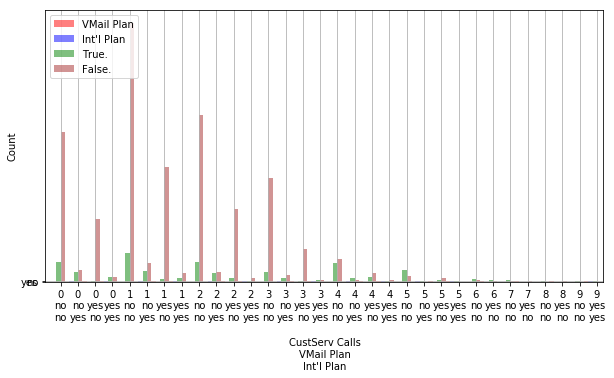

In [30]:
cluster_bar_chart(dc_vmp_ip_c_df)

## 3.3.2 Numerical Variables

### 3.3.2.1 Usual Histogram/Bar Charts

Unfortunately, the usual type of histogram does not help us determine whether the predictor variables are associated with the target variable. For example, in the below histogram of the predictor variable customer service calls, with no overlay. We can see that the distribution is right skewed with a mode of one call, but we have no information on whether this variable is useful for predicting churn.

<BarContainer object of 10 artists>

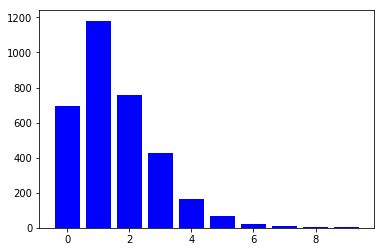

In [70]:
variable = 'CustServ Calls'
y = df[variable].tolist()
new_x, new_y = get_x_y_for_categorical_variable(y)
plt.bar(new_x, new_y, width=0.8, color='b', label=variable)

### 3.3.2.2 Multiple Stacked Histogram/Bar Chart

Below is a histogram of customer service calls with churn overlay. It hints that the churn proportion may be greater for higher numbers of customer service calls, but it is difficult to discern this result unequivocally.

In [71]:
csc_c_df = generate_df_for_clustered_bar_chart([variable, "Churn?"])

In [72]:
csc_c_df

,CustServ Calls,False.,True.
0,0,605.0,92
1,1,1059.0,122
2,2,672.0,87
3,3,385.0,44
4,4,90.0,76
5,5,26.0,40
6,6,8.0,14
7,7,4.0,5
8,8,1.0,1
9,9,NaN,2


In [73]:
def plot_stacked_bar_chart(df, cols):
    df = df[cols]
    d = df.fillna(df).astype(df.dtypes)
    d.plot.bar(x=cols[0], y=cols[1:], stacked=True)

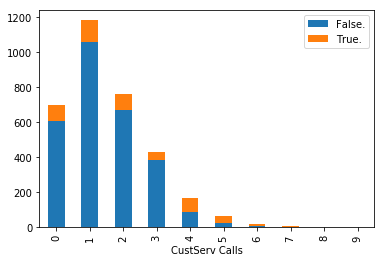

In [74]:
plot_stacked_bar_chart(csc_c_df, csc_c_df.columns)

### 3.3.2.3 Streched/Normalized Multiple Stacked Bar Chart

We therefore turn to the “normalized” histogram, where every rectangle has the same height and width. Note that the proportions of churners versus non-churners is exactly the same; it is just that “stretching out” the rectangles that have low counts enables better definition and contrast.

In [75]:
def normalize_or_stretch_bar_graph_df(df, cols):
    df = df.fillna(value=0)
    df['sum'] = df[cols].sum(axis=1)
    scale_value = max(df['sum'].tolist())
    for idx, row in df.iterrows():
        for col in cols:
            current_value = row[col]
            fraction = current_value / row['sum']
            df.at[idx, col] = fraction * scale_value
    return df[df.columns[:-1]]

In [76]:
csc_c_norm_df = normalize_or_stretch_bar_graph_df(csc_c_df, csc_c_df.columns[1:])
csc_c_norm_df

,CustServ Calls,False.,True.
0,0,1025.114778,155
1,1,1059.000000,122
2,2,1045.628458,135
3,3,1059.871795,121
4,4,640.301205,540
5,5,465.242424,715
6,6,429.454545,751
7,7,524.888889,656
8,8,590.500000,590
9,9,0.000000,1181


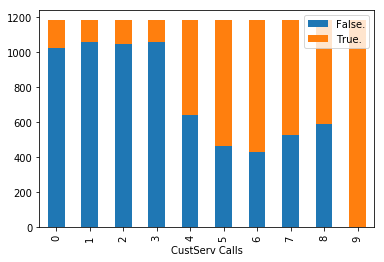

In [77]:
plot_stacked_bar_chart(csc_c_norm_df, csc_c_norm_df.columns)

“Normalized” histogram of customer service calls with churn overlay. The pattern now becomes crystal clear. Customers who have called customer service three times or less have a markedly lower churn rate (orange part of the rectangle) than customers who have called customer service four or more times.

This EDA on the customer service calls has indicated that
1. We should carefully track the number of customer service calls made by each customer. By the third call, specialized incentives should be offered to retain customer loyalty, because, by the fourth call, the probability of churn increases greatly.
2. we should expect that, whatever data mining algorithms we use to predict churn, the model will probably include the number of customer service calls made by the customer.

Normalized histograms are useful for teasing out the relationship between a numerical predictor and the target. However, data analysts should always provide the companion a non-normalized histogram along with the normalized histogram, because the normalized histogram does not provide any information on the frequency distribution of the variable.

The lack of obvious association at the EDA stage between a predictor and a target variable is not sufficient reason to omit that predictor from the model. However, we should nevertheless retain the predictor as an input variable for the data mining models, because actionable associations may still exist for identifiable subsets of the records, and they may be involved in higher-dimension associations and interactions.

In any case, unless there is a good reason for eliminating the variable before modeling, then we should probably allow the modeling process to identify which variables are predictive and which are not. A hypothesis test, such as this t-test, represents statistical inference and model building, and as such lies beyond the scope of EDA.

<BarContainer object of 21 artists>

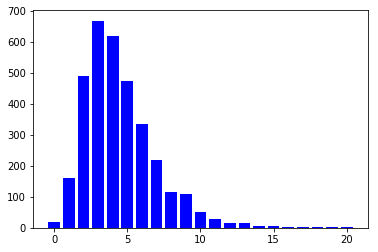

In [79]:
variable = 'Intl Calls'
y = df[variable].tolist()
new_x, new_y = get_x_y_for_categorical_variable(y)
plt.bar(new_x, new_y, width=0.8, color='b', label=variable)

In [80]:
ic_c_df = generate_df_for_clustered_bar_chart([variable, "Churn?"]).fillna(value=0)
ic_c_df

,Intl Calls,False.,True.
0,0,18.0,0.0
1,1,129.0,31.0
2,2,381.0,108.0
3,3,570.0,98.0
4,4,540.0,79.0
5,5,419.0,53.0
6,6,293.0,43.0
7,7,191.0,27.0
8,8,105.0,11.0
9,9,95.0,14.0


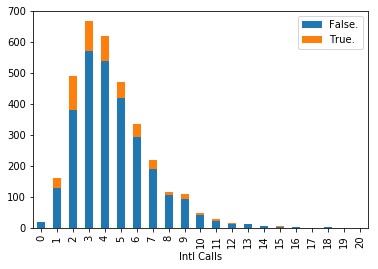

In [81]:
plot_stacked_bar_chart(ic_c_df, ic_c_df.columns)

In [82]:
ic_c_norm_df = normalize_or_stretch_bar_graph_df(ic_c_df, ic_c_df.columns[1:])
ic_c_norm_df

,Intl Calls,False.,True.
0,0,668.000000,0.000000
1,1,538.575000,129.425000
2,2,520.466258,147.533742
3,3,570.000000,98.000000
4,4,582.746365,85.253635
5,5,592.991525,75.008475
6,6,582.511905,85.488095
7,7,585.266055,82.733945
8,8,604.655172,63.344828
9,9,582.201835,85.798165


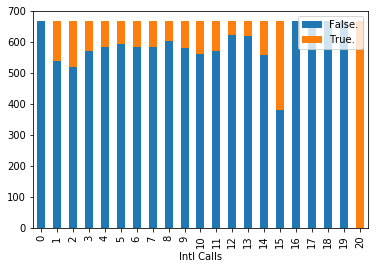

In [83]:
plot_stacked_bar_chart(ic_c_norm_df, ic_c_norm_df.columns)

The predictor International Calls with churn overlay, do not indicate strong graphical evidence of the predictive importance of International Calls. However, a t-test for the difference in mean number of international calls for churners and non-churners is statistically significant, meaning that this variable is indeed useful for predicting churn: Churners tend to place a lower mean number of international calls. Thus, had we omitted International Calls from the analysis based on the seeming lack of graphical evidence, we would have committed a mistake, and our predictive model would not perform as well.

### 3.3.2.4 Mulrivariate Relationships

We next turn to an examination of the possible multivariate associations of numeric variables with churn, using scatter plots. Multivariate graphics can uncover new interaction effects which our univariate exploration missed.

In [34]:
dm_em_c_df = generate_df_for_clustered_bar_chart(["Day Mins", "Eve Mins", "Churn?"]).fillna(value=0)
dm_em_c_df

,Day Mins,Eve Mins,True.,False.
0,0.0,159.6,1.0,0.0
1,0.0,192.1,0.0,1.0
2,2.6,254.0,0.0,1.0
3,7.8,171.4,0.0,1.0
4,7.9,136.4,0.0,1.0
5,12.5,256.6,0.0,1.0
6,17.6,161.7,0.0,1.0
7,18.9,258.4,0.0,1.0
8,19.5,140.9,0.0,1.0
9,25.9,206.5,0.0,1.0


In [85]:
print(max(dm_em_c_df['True.']))

2.0


In [86]:
print(max(dm_em_c_df['False.']))

2.0


### 3.3.2.5 3D Scatter Plot

In [87]:
from mpl_toolkits import mplot3d

def _3d_scatter_plot(xs, ys, zslist, l1, l2, l3list):
    colors = ['red', 'blue', 'orange', 'green', 'brown']
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(l1)
    ax.set_ylabel(l2)
    ax.set_zlabel(l3list)
    for i, zs in enumerate(zslist):
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, color=colors[i], edgecolors='w')

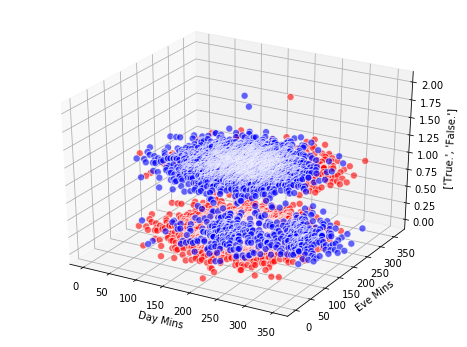

In [88]:
x = dm_em_c_df["Day Mins"].tolist()
y = dm_em_c_df["Eve Mins"].tolist()
zlist = list()
zlist.append(dm_em_c_df["True."].tolist())
zlist.append(dm_em_c_df["False."].tolist())
_3d_scatter_plot(x, y, zlist, "Day Mins",  "Eve Mins", ["True.", "False."])

### 3.3.2.6 2D Scatter Plot With Varying Size

In [89]:
def _2d_scatter_plot_with_size(xs, ys, zslist, l1, l2, l3list):
    colors = ['red', 'blue', 'orange', 'green', 'brown']
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel(l1)
    ax.set_ylabel(l2)
    for i, zs in enumerate(zslist):
        ax.scatter(xs, ys, s=10*4*zslist[i], color=colors[i])

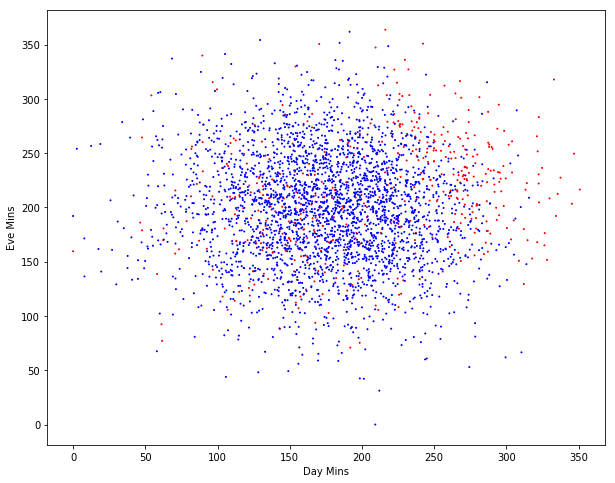

In [90]:
_2d_scatter_plot_with_size(x, y, zlist, "Day Mins",  "Eve Mins", ["True.", "False."])

Note the upper right section of the graph. Records in this region, representing customers with both high day minutes and high evening minutes, appear to have a higher proportion of churners. The univariate evidence for a high churn rate for high evening minutes was not conclusive, so it is nice to have a multivariate graph that supports the association, at least for customers with high day minutes.

In [91]:
dm_csc_c_df = generate_df_for_clustered_bar_chart(["Day Mins", "CustServ Calls", "Churn?"]).fillna(value=0)
dm_csc_c_df.columns

Index(['Day Mins', 'CustServ Calls', 'False.', 'True.'], dtype='object')

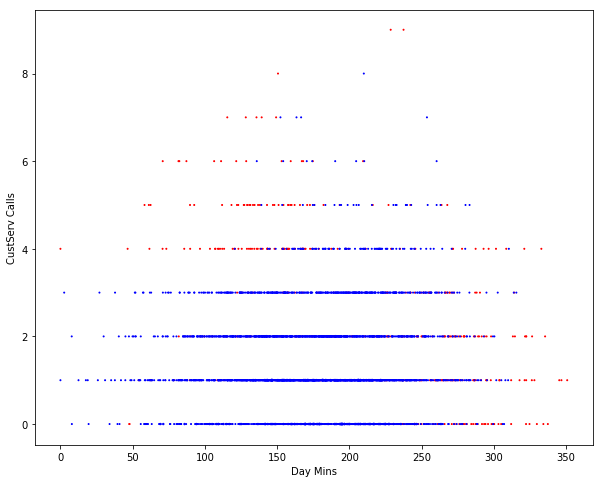

In [92]:
x = dm_csc_c_df["Day Mins"].tolist()
y = dm_csc_c_df["CustServ Calls"].tolist()
zlist = list()
zlist.append(dm_csc_c_df["True."].tolist())
zlist.append(dm_csc_c_df["False."].tolist())
_2d_scatter_plot_with_size(x, y, zlist, "Day Mins",  "CustServ Calls", ["True.", "False."])

In general, customers with higher numbers of customer service calls tend to churn at a higher rate, as we learned earlier in the univariate analysis. However, above chart shows that, of these customers with high numbers of customer service calls, those who also have high day minutes are somewhat "protected” from this high churn rate. The customers in the upper right of the scatter plot exhibit a lower churn rate than those in the upper left. But how do we quantify these graphical findings?

## 3.4 Selecting Interesting Subsets of the Data for Further Investigation

###  3.4.1 Zooming into am interesting Subset

In [93]:
dm_csc_c_df_top_right = dm_csc_c_df.loc[(dm_csc_c_df['Day Mins'] >= 175) & (dm_csc_c_df['CustServ Calls'] >= 4)]

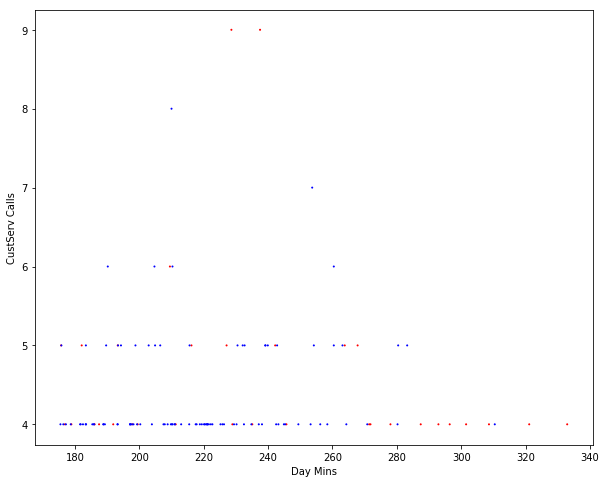

In [94]:
x = dm_csc_c_df_top_right["Day Mins"].tolist()
y = dm_csc_c_df_top_right["CustServ Calls"].tolist()
zlist = list()
zlist.append(dm_csc_c_df_top_right["True."].tolist())
zlist.append(dm_csc_c_df_top_right["False."].tolist())
_2d_scatter_plot_with_size(x, y, zlist, "Day Mins",  "CustServ Calls", ["True.", "False."])

### 3.4.2 Quantifying the zoomed in subset

In [95]:
sum_data = dm_csc_c_df_top_right.sum(axis=0, skipna=True)
sum_data

Day Mins          28446.6
CustServ Calls      565.0
False.               97.0
True.                32.0
dtype: float64

In [96]:
False_Percent = (97.0 * 100.0) / (97.0 + 32.0)
False_Percent

75.1937984496124

In [97]:
True_Percent = 100 - False_Percent
True_Percent

24.8062015503876

So for customers with high number of customer service calls and high talking time in the day for those customer calls the churning probability is as less as 24.8%.

In [98]:
dm_csc_c_df_top_left = dm_csc_c_df.loc[(dm_csc_c_df['Day Mins'] < 175) & (dm_csc_c_df['CustServ Calls'] >= 4)]

In [99]:
sum_data = dm_csc_c_df_top_left.sum(axis=0, skipna=True)
sum_data

Day Mins          18415.4
CustServ Calls      638.0
False.               32.0
True.               106.0
dtype: float64

In [100]:
False_Percent = (32.0 * 100.0) / (32.0 + 106.0)
False_Percent

23.18840579710145

In [101]:
True_Percent = 100 - False_Percent
True_Percent

76.81159420289855

But for customers with high number of customer service calls and low talking time in the day for those customer calls the churning probability is as high as 76.8%. Thus, it is recommended that we red-flag customers with low day minutes who have a high number of customer service calls, as they are at much higher risk of leaving the company's service than the customers with the same number of customer service calls, but higher day minutes.

## 3.5 Binning Based on Predictive Value

We saw that customers with less than four calls to customer service had a lower churn rate than customers who had four or more calls to customer service. We may therefore decide to bin the customer service calls variable into two classes, low (fewer than four) and high (four or more).

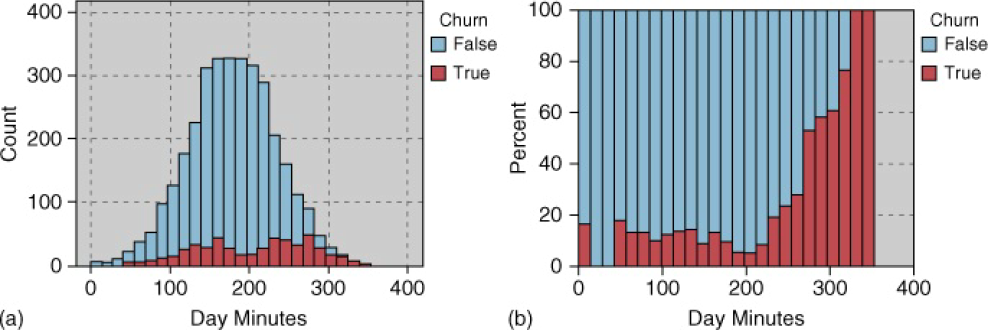

Shows a slight tendency for customers with higher evening minutes to churn. Based solely on the graphical evidence, however, we cannot conclude beyond a reasonable doubt that such an effect exists. Therefore, we shall hold off on formulating policy recommendations on evening cell-phone use until our data mining models offer firmer evidence that the putative effect is in fact present.

Can we use binning to help tease out a signal from this noise? We reproduce the figure somewhat enlarged, and with the boundaries between the bins indicated.

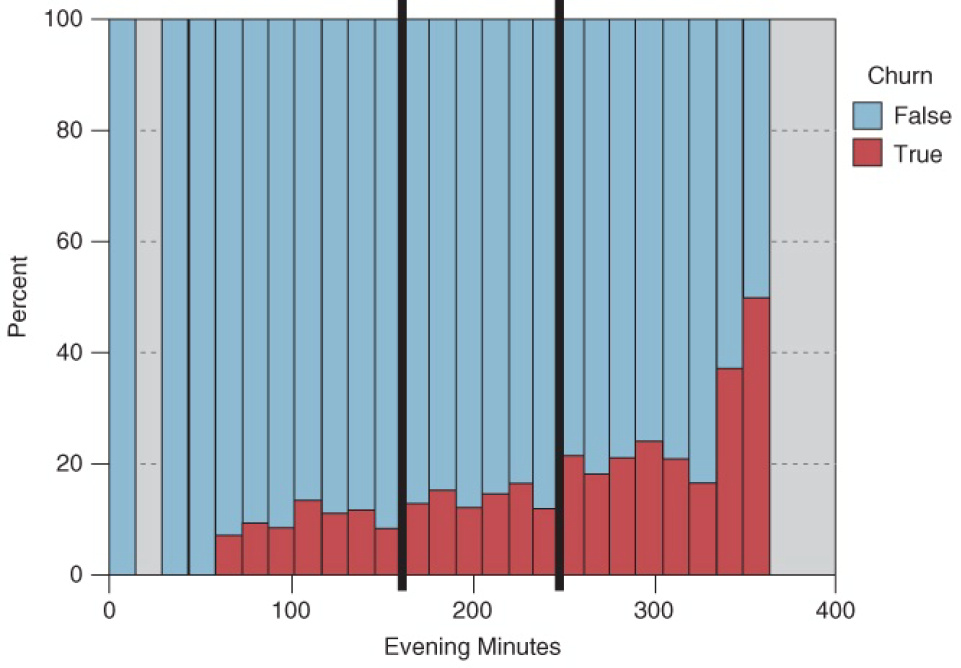

Binning is an art, requiring judgment. Where can I insert boundaries between the bins that will maximize the difference in churn proportions? The first boundary is inserted at evening minutes = 160, as the group of rectangles to the right of this boundary seem to have a higher proportion of churners than the group of rectangles to the left. And the second boundary is inserted at evening minutes = 240 for the same reason. 

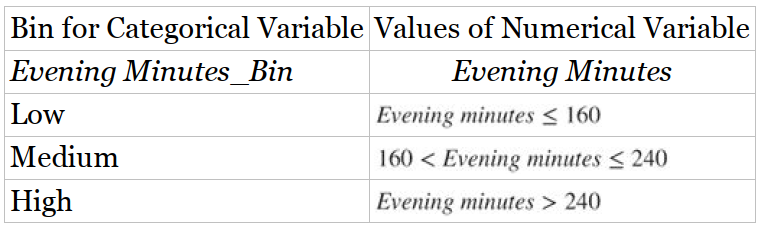

## 3.6 Deriving New Variables: Flag Variables and Numerical Variable

Suppose we would like to derive a new numerical variable which combines Customer Service Calls and International Calls, and whose values will be the mean of the two fields. Now, as International Calls have a larger mean and standard deviation than Customer Service Calls, it would be unwise to take the mean of the raw field values, as International Calls would thereby be more heavily weighted. Instead, when combining numerical variables, we first need to standardize. The new derived variable therefore takes the form:

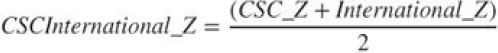

where CSC_Z represents the z-score standardization of Customer Service Calls and International_Z represents the z-score standardization of International Calls. The resulting normalized histogram of CSCInternational_Z indicates that it will be useful for predicting churn.

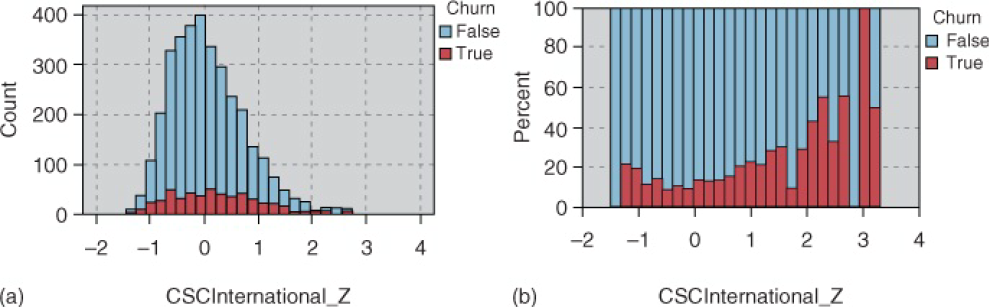

## 3.7 Using EDA to Investigate Correlated Predictor Variables

Two variables x and y are linearly correlated if an increase in x is associated with either an increase in y or a decrease in y. The correlation coefficient r quantifies the strength and direction of the linear relationship between x and y. The threshold for significance of the correlation coefficient r depends not only on the sample size but also on data mining, where there are a large number of records (over 1000), even small values of r, such as may be statistically significant.

#### STRATEGY FOR HANDLING CORRELATED PREDICTOR VARIABLES AT THE EDA STAGE

1. Identify any variables that are perfectly correlated (i.e., or ). Do not retain both variables in the model, but rather omit one.
2. Identify groups of variables that are correlated with each other. Then, later, during the modeling phase, apply dimension-reduction methods, such as principal components analysis,2 to these variables.

**Note that this strategy applies to uncovering correlation among the predictors alone, not between a given predictor and the target variable.**



### 3.7.1 Types of data and Correlations Techniques used for them

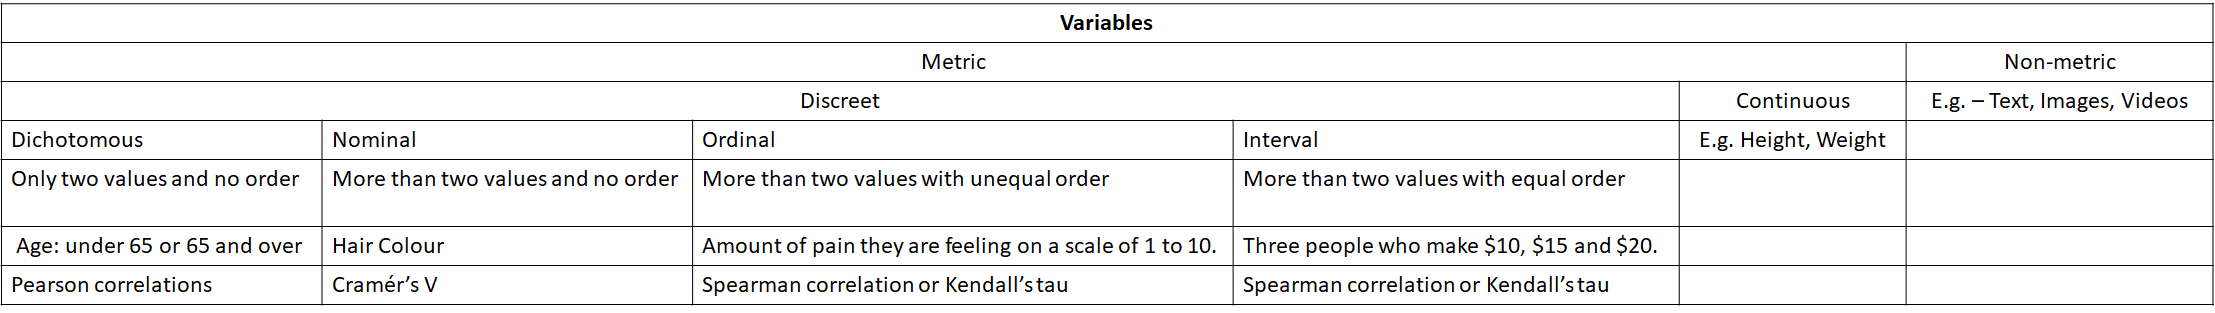

### 3.7.2 Pearson Correlation

1. Linear association between continuous variables.

### 3.7.3 Spearman correlation

1. Monotonic association (only strictly increasing or decreasing, but not mixed).
2. Both continuous and discrete data.

### 3.7.4 Kendall's Tau

1. More appropriate for discrete data.

### 3.7.5 Few Examples

In [40]:
import pandas as pd
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

In [41]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [42]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.8317409332443354

In [43]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


In [44]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0


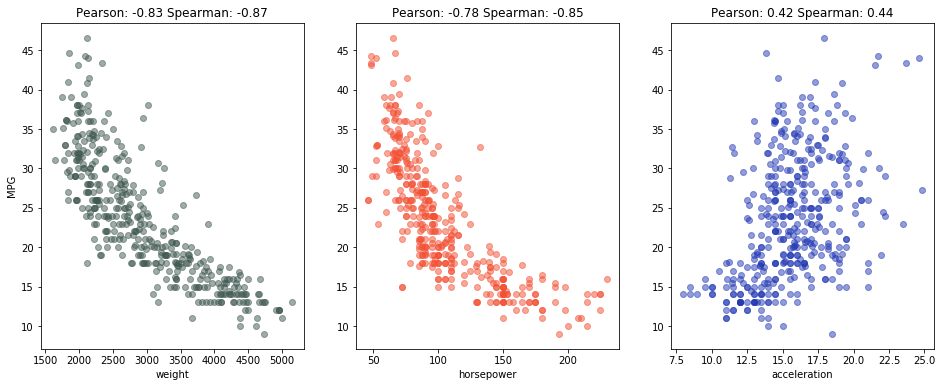

In [45]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    j+=1

plt.show()

### 3.7.6 Visualizing Covariance

https://evangelinereynolds.netlify.com/post/geometric-covariance/

### 3.7.7 Introduction to correlation in python

https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science

A splendid way for finding out any relationship between two variables is inspecting a scatterplot for these two variables. The extent to which our dots lie on a straight line indicates the strength of the relation. The Pearson correlation is a number that indicates the exact strength of this relation.

### 3.7.8 Correlation Coefficient - Interpretation Caveats

1. Correlations may or may not indicate causal relations. Reversely, causal relations from some variable to another variable may or may not result in a correlation between the two variables.
2. Correlations are very sensitive to outliers; a single unusual observation may have a huge impact on a correlation. Such outliers are easily detected by a quick inspection a scatterplot.
3. Correlations by no means an exhaustive summary of relationships within the data. Weak or no correlation does not imply a lack of association, and even a strong correlation coefficient might not fully capture the nature of the relationship. It is always a good idea to use visualization techniques and multiple statistical data summaries to get a better picture of how your variables relate to each other.

### 3.7.9 Covariance and Correlation Coefficient

Covariance formula is a statistical formula which is used to assess the relationship between two variables. In simple words, covariance is one of the statistical measurement to know the relationship of the variance between the two variables.

The covariance indicates how two variables are related and also helps to know whether the two variables vary together or change together. The covariance is denoted as ${Cov(X,Y)}$ and the formulas for covariance are given below.

\begin{align}
Cov_{population}(x,y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{N} \\
Cov_{sample}(x,y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{N - 1}
\end{align}

${x_i}$ = data value of ${x}$<br>
${y_i}$ = data value of ${y}$<br>
${\bar{x}}$ = mean of ${x}$<br>
${\bar{y}}$ = mean of ${y}$<br>
${N}$ = number of data values.<br>

\begin{align}
Correlation_{sample}(x,y) = r = \frac{Cov_{sample}(x,y)}{\sigma{_x}\sigma{_y}} \\
Correlation_{population}(x,y) = ρ = \frac{Cov_{population}(x,y)}{\sigma{_x}\sigma{_y}}
\end{align}

${\sigma{_x}}$ = standard deviation of ${x}$<br>
${\sigma{_y}}$ = standard deviation of ${y}$<br>

### 3.7.10 Correlation - Statistical Significance

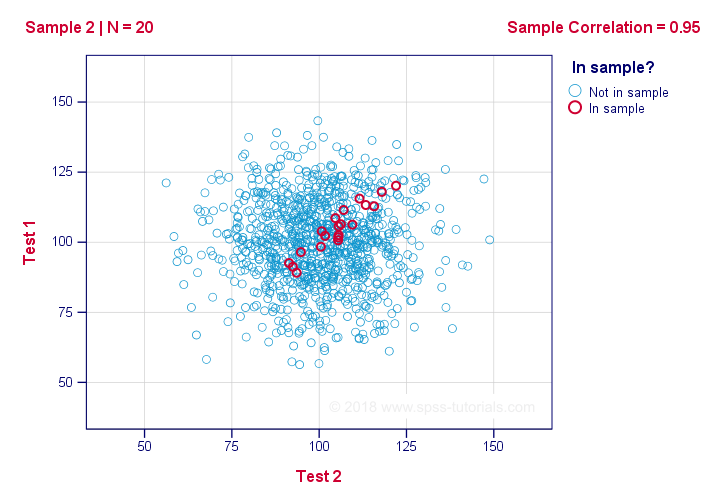

The **correlation coefficient, ${r}$**, tells us about the strength and direction of the linear relationship between ${x}$ and ${y}$. However, the reliability of the linear model also depends on how many observed data points are in the sample. We need to look at **both the value of the correlation coefficient ${r}$ and the sample size ${n}$, together**. We perform a hypothesis test of the **“significance of the correlation coefficient”** to decide whether the **linear relationship** in the sample data is strong enough to use to model the relationship in the population. The sample data are used to compute ${r}$, the correlation coefficient for the sample. If we had data for the entire population, we could find the population correlation coefficient. But because we have only have sample data, we cannot calculate the population correlation coefficient. The sample correlation coefficient, ${r}$, is our estimate of the unknown population correlation coefficient.

The symbol for the **population correlation coefficient is ${ρ}$, the Greek letter “rho.”**

    ρ = population correlation coefficient (unknown)
    r = sample correlation coefficient (known; calculated from sample data)
    
The hypothesis test lets us decide whether the value of the population correlation coefficient ${ρ}$ is **“close to zero”** or **“significantly different from zero”**. We decide this based on the sample correlation coefficient ${r}$ and the sample size ${n}$.<br><br>
If the test concludes that the correlation coefficient is significantly different from zero, we say that the correlation coefficient is **“significant”**.
##### What the conclusion means: There is a significant linear relationship between x and y. We can use the regression line to model the linear relationship between x and y in the population.
If the test concludes that the correlation coefficient is not significantly different from zero (it is close to zero), we say that correlation coefficient is **“not significant”**.
##### What the conclusion means: There is not a significant linear relationship between x and y. Therefore, we CANNOT use the regression line to model a linear relationship between x and y in the population.

## 3.8 Understanding Hypothesis Tests

Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. When we say that - **"a finding is statistically significant", it’s thanks to a hypothesis test**. How do these tests really work and what does statistical significance actually mean?

### 3.8.1 The Need for Hypothesis Tests

Why do we even need hypothesis tests? After all, we took a random sample and our sample mean of 330.6 is different from 260. That is different, right? Unfortunately, the picture is muddied because we’re looking at a sample rather than the entire population.

Sampling error is the difference between a sample and the entire population. Thanks to sampling error, it’s entirely possible that while our sample mean is 330.6, the population mean could still be 260. Or, to put it another way, if we repeated the experiment, it’s possible that the second sample mean could be close to 260. A hypothesis test helps assess the likelihood of this possibility!

### 3.8.2 Prerequisite concepts

#### 3.8.2.1 Distribution

A distribution is simply a collection of data, or scores, on a variable. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically. From a practical perspective, we can think of a distribution as a function that describes the relationship between observations in a sample space. Many data conform to well-known and well-understood mathematical functions, such as the Gaussian distribution. Once a distribution function is known, it can be used as a shorthand for describing and calculating related quantities, such as likelihoods of observations, and plotting the relationship between observations in the domain.

C:\Users\biswapratap.chatterj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


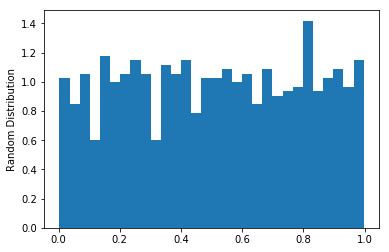

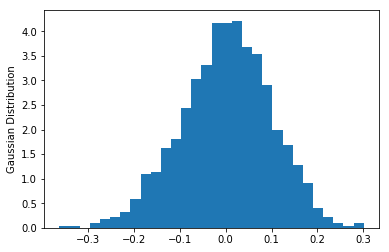

In [102]:
import numpy as np
import matplotlib.pyplot as plt

y = np.random.rand(1000)
plt.hist(y, 30, normed=True) 
plt.ylabel("Random Distribution")
plt.show() 

mean = 0 
std = 0.1
y_array = np.random.normal(0, 0.1, 1000)
plt.hist(y_array, 30, normed=True) 
plt.ylabel("Gaussian Distribution")
plt.show() 
  

#### 3.8.2.2 Probability Distribution

A probability distribution is a table or an equation or a graph that links each outcome of a statistical experiment with its probability of occurrence. To understand probability distributions, it is important to understand variables. random variables, and some notation.

1. **Variable** : A variable is a symbol (A, B, x, y, etc.) that can take on any of a specified set of values.
2. **Random Variable** : When the value of a variable is the outcome of a statistical experiment, that variable is a random variable.
    1. Dicreet Random Variable
    2. Continuous Random Variable
3. **Representation** : Generally, statisticians use a capital letter to represent a random variable and a lower-case letter, to represent one of its values.
4. **X** represents the random variable X.
5. **P(X)** represents the probability of X.
6. **P(X = x)** refers to the probability that the random variable X is equal to a particular value, denoted by x. As an example, P(X = 1) refers to the probability that the random variable X is equal to 1.

https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-continuous/v/probability-density-functions

***Example***

An example will make clear the relationship between random variables and probability distributions. Suppose you flip a coin two times. This simple statistical experiment can have four possible outcomes: HH, HT, TH, and TT. **Now, let the variable X represent the number of Heads that result from this experiment**. The variable X can take on the values 0, 1, or 2. In this example, X is a random variable; because its value is determined by the outcome of a statistical experiment. A probability distribution is a table or an equation that links each outcome of a statistical experiment with its probability of occurrence. Consider the coin flip experiment described above. The table below, which associates each outcome with its probability, is an example of a probability distribution.

The below table represents the probability distribution of the random variable X : 

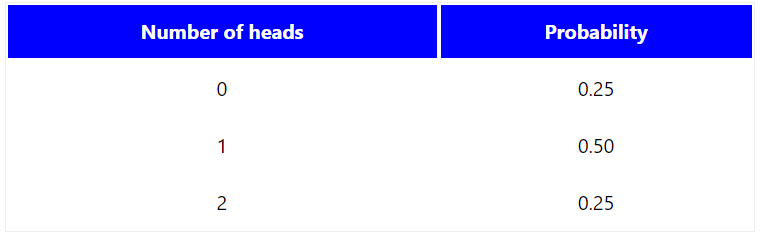

#### 3.8.2.3 Sampling Distribution

1. A sampling distribution is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population.
2. The sampling distribution of a given population is the distribution of frequencies of a range of different outcomes that could possibly occur for a statistic of a population.
3. A lot of data drawn and used by academicians, statisticians, researchers, marketers, and analysts are actually samples, not populations.

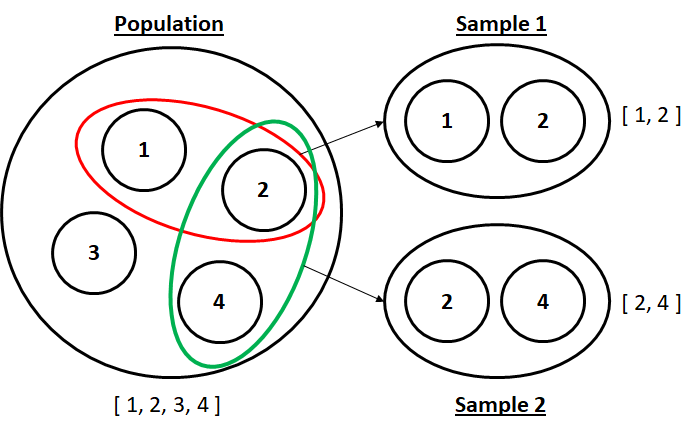

${Population Mean = \frac{(1 + 2 + 3 + 4)}{4} = 2.5}$<br><br>

**List of all the possible samples drawn from the population (with replacement)**

${Sample (1, 1), Mean   = \frac{(1 + 1)}{2} = 1}$<br>
${Sample (1, 2), Mean   = \frac{(1 + 2)}{2} = 1.5}$<br>
${Sample (1, 3), Mean   = \frac{(1 + 3)}{2} = 2}$<br>
${Sample (1, 4), Mean   = \frac{(1 + 4)}{2} = 2.5}$<br><br>

${Sample (2, 1), Mean   = \frac{(2 + 1)}{2} = 1.5}$<br>
${Sample (2, 2), Mean   = \frac{(2 + 2)}{2} = 2}$<br>
${Sample (2, 3), Mean   = \frac{(2 + 3)}{2} = 2.5}$<br>
${Sample (2, 4), Mean   = \frac{(2 + 4)}{2} = 3}$<br><br>

${Sample (3, 1), Mean   = \frac{(3 + 1)}{2} = 2}$<br>
${Sample (3, 2), Mean   = \frac{(3 + 2)}{2} = 2.5}$<br>
${Sample (3, 3), Mean   = \frac{(3 + 3)}{2} = 3}$<br>
${Sample (3, 4), Mean   = \frac{(3 + 4)}{2} = 3.5}$<br><br>

${Sample (4, 1), Mean   = \frac{(4 + 1)}{2} = 2.5}$<br>
${Sample (4, 2), Mean   = \frac{(4 + 2)}{2} = 3}$<br>
${Sample (4, 3), Mean   = \frac{(4 + 3)}{2} = 3.5}$<br>
${Sample (4, 4), Mean   = \frac{(4 + 4)}{2} = 4}$<br><br>

${P(X=1)   = \frac{1}{16}}$<br>
${P(X=1.5) = \frac{2}{16}}$<br>
${P(X=2)   = \frac{3}{16}}$<br>
${P(X=2.5) = \frac{4}{16}}$<br>
${P(X=3) = \frac{3}{16}}$<br>
${P(X=3.5) = \frac{2}{16}}$<br>
${P(X=4) = \frac{1}{16}}$<br>

${Total Probability = \frac{1}{16} + \frac{2}{16} + \frac{3}{16} + \frac{4}{16} + \frac{3}{16} + \frac{2}{16} + \frac{1}{16} = \frac{(1 + 2 + 3 + 4 + 3 + 2 + 1)}{16} = \frac{16}{16} = 1\;or\;100\%}$ 

Text(0.5,1,'Sample Count of Size (2) = 4')

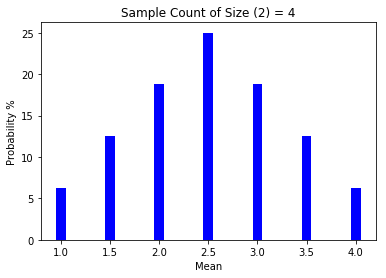

In [5]:
y = [(1/16)*100, (2/16)*100, (3/16)*100, (4/16)*100, (3/16)*100, (2/16)*100, (1/16)*100]
x = [1, 1.5, 2, 2.5, 3, 3.5, 4]
plt.bar(x, y, color='b', width=0.1)
plt.ylabel('Probability %')
plt.xlabel('Mean')
plt.title("Sample Count of Size (" + str(2) + ") = " + str(4))

In [89]:
def get_probability_distribution(y):
    categories = list(set(y))
    new_x = categories
    new_y = list()
    for x_val in new_x:
        freq = 0
        for y_val in y:
            if x_val == y_val:
                freq += 1
        probability = (freq/len(y)) * 100
        new_y.append(probability)
    return new_x, new_y

In [98]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def sample_mean_probability_distribution(l, n):
    all_possible_samples = list(itertools.permutations(l, n))
    mean_of_all_samples = [sum(p)/len(p) for p in all_possible_samples]
    g_x, g_y = get_probability_distribution(mean_of_all_samples)
    plt.bar(g_x, g_y, color='b', width=0.1)
    plt.ylabel('Probability %')
    plt.xlabel('Mean')
    plt.title("Sample Count of Size (" + str(n) + ") = " + str(len(all_possible_samples)))

Text(0.5,1,'Population Distribution')

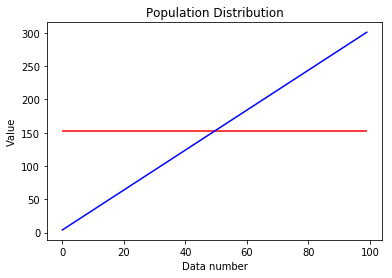

In [119]:
x_new = [i for i in range(0, 100, 1)]
y_new = list()
for x_n in x_new:
    y_n = 3 * x_n + 4 # (y = 3x + 4)
    y_new.append(y_n)
plt.plot(x_new, y_new, color='b')
population_mean = sum(y_new)/len(y_new)
plt.hlines(population_mean, x_new[0], x_new[-1], color='r')
plt.ylabel('Value')
plt.xlabel('Data number')
plt.title('Population Distribution')

Text(0.5,1,'Population Distribution')

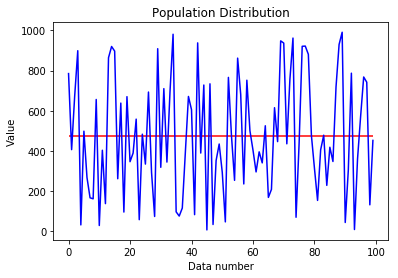

In [120]:
l = np.random.randint(low=1, high=1000, size=100)
x = [i for i in range(0, len(l), 1)]
plt.plot(x, l, color='b')
population_mean = sum(l)/len(l)
plt.hlines(population_mean, x[0], x[-1], color='r')
plt.ylabel('Value')
plt.xlabel('Data number')
plt.title('Population Distribution')

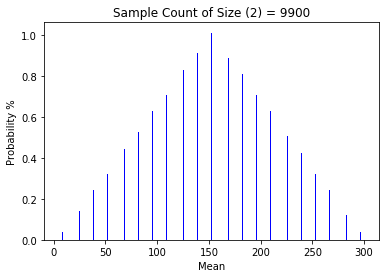

In [123]:
sample_mean_probability_distribution(y_new, 2)

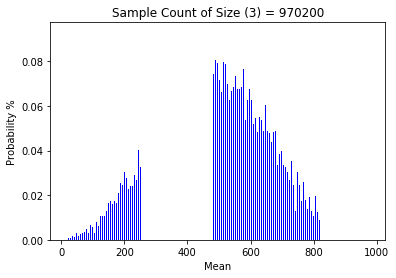

In [128]:
sample_mean_probability_distribution(l, 3)

**Note: The area under the (mean or any) probability distribution curve is always equal to 1 or 100%**

#### 3.8.2.4 Sampling Error

Sampling error is the error that arises in a data collection process as a result of taking a sample from a population rather than using the whole population. Sampling error is one of two reasons for the difference between an estimate of a population parameter and the true, but unknown, value of the population parameter. 

### 3.8.3 The Scenario (Example)

An economist wants to determine whether the monthly energy cost for families has changed from the previous year, when the mean cost per month was $260. The economist randomly samples 25 families and records their energy costs for the current year. 

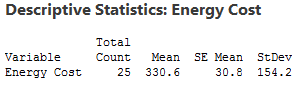

### 3.8.4 Use the Sampling Distribution to See If Our Sample Mean is Unlikely

For any given random sample, the mean of the sample almost certainly doesn’t equal the true mean of the population due to sampling error. For our example, it’s unlikely that the mean cost for the entire population is exactly 330.6. In fact, if we took multiple random samples of the same size from the same population, we could plot a distribution of the sample means.

**A sampling distribution is the distribution of a statistic, such as the mean, that is obtained by repeatedly drawing a large number of samples from a specific population (as shown in the charts above). This distribution allows you to determine the probability of obtaining the sample statistic.**

Our goal is to determine whether our sample mean is significantly different from the null hypothesis mean. Therefore, we’ll use the graph to see whether our sample mean of 330.6 is unlikely assuming that the population mean is 260. The graph below shows the expected distribution of sample means.

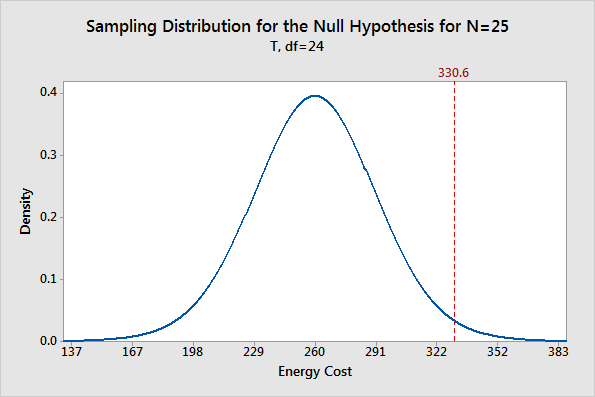

You can see that the most probable sample mean is 260, which makes sense because we’re assuming that the null hypothesis is true. However, there is a reasonable probability of obtaining a sample mean that ranges from 167 to 352, and even beyond! The takeaway from this graph is that while our sample mean of 330.6 is not the most probable, it’s also not outside the realm of possibility.

### 3.8.5 The Role of Hypothesis Tests

We’ve placed our sample mean in the context of all possible sample means while assuming that the null hypothesis is true. Are these results statistically significant? As you can see, there is no magic place on the distribution curve to make this determination. Instead, we have a continual decrease in the probability of obtaining sample means that are further from the null hypothesis value. Where do we draw the line? This is where hypothesis tests are useful. A hypothesis test allows us quantify the probability that our sample mean is unusual.

Types of Hypothesis Tests:
1. Significance Levels (alpha) and P values
2. Confidence Intervals and Confidence Levels

### 3.8.6 Significance Levels (${\alpha}$) and P values in Statistics

#### 3.8.6.1 Hypothesis
1. **Null hypothesis:** The population mean equals the hypothesized mean (260) i.e. no change in the hypothesized mean whatsoever.
2. **Alternative hypothesis:** The population mean differs from the hypothesized mean (260) i.e. significant change in the hypothesized mean.

#### 3.8.6.2 What Is the Significance Level (${\alpha}$)?

The **significance level ${\alpha}$** determines how far out from the null hypothesis value we'll draw that line on the graph. To graph a significance level ${\alpha}$ of 0.05, we need to shade the 5% of the distribution that is furthest away from the null hypothesis.

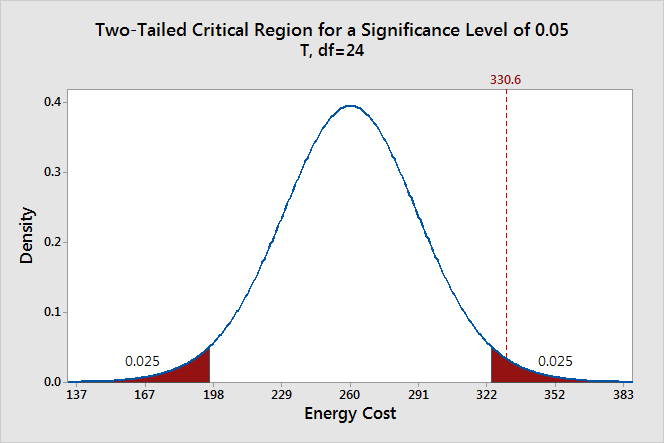

In the graph above, the two shaded areas are equidistant from the null hypothesis value and each area has a probability of 0.025, for a total of 0.05. In statistics, we call these shaded areas the **critical region** for a two-tailed test. If the population mean is 260, we’d expect to obtain a sample mean that falls in the critical region 5% of the time. The critical region defines how far away our sample statistic must be from the null hypothesis value before we can say it is unusual enough to reject the null hypothesis. Our sample mean (330.6) falls within the critical region, which indicates it is statistically significant at the 0.05 level.

We can also see if it is statistically significant using the other common significance level of 0.01.

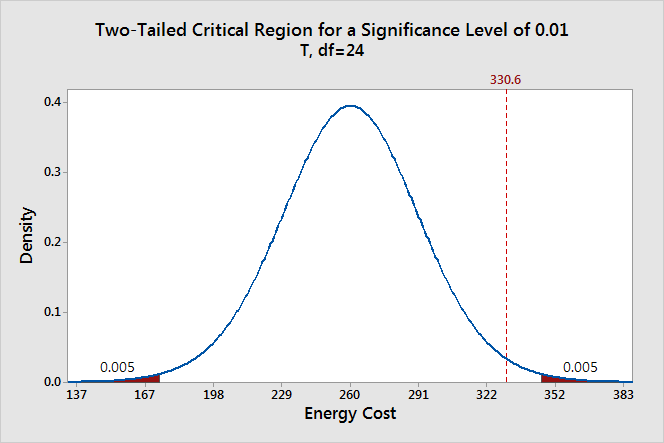

The two shaded areas each have a probability of 0.005, which adds up to a total probability of 0.01. This time our sample mean does not fall within the critical region and we fail to reject the null hypothesis. This comparison shows why you need to choose your significance level before you begin your study. It protects you from choosing a significance level ${\alpha}$ because it conveniently gives you significant results!

Thanks to the graph, we were able to determine that our results are statistically significant at the 0.05 level without using a P value. However, when you use the numeric output, you’ll need to compare the P value to your significance level ${\alpha}$ to make this determination.

#### 3.8.6.3 What Are P values?

P-values are the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

To graph the P value for our example data set, we need to determine the distance between the sample mean and the null hypothesis value (330.6 - 260 = 70.6). Next, we can graph the probability of obtaining a sample mean that is at least as extreme in both tails of the distribution (260 +/- 70.6).

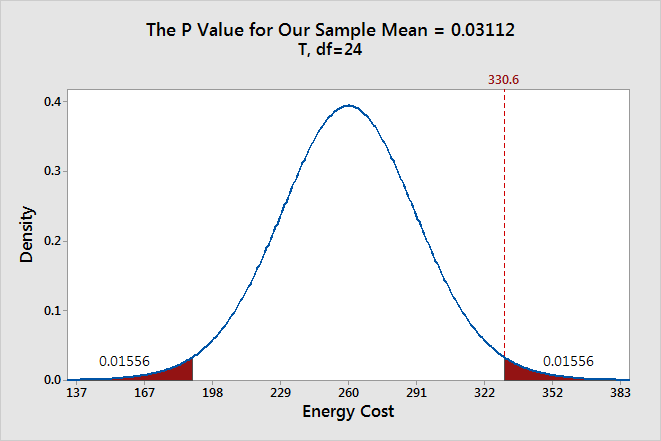

**In the graph above, the two shaded areas each have a probability of 0.01556, for a total probability 0.03112. This probability represents the likelihood of obtaining a sample mean that is at least as extreme as our sample mean in both tails of the distribution if the population mean is 260. That’s our P value!** When a P value is less than or equal to the significance level ${\alpha}$, you reject the null hypothesis. If we take the P value for our example and compare it to the common significance levels, it matches the previous graphical results. The P value of 0.03112 is statistically significant at an alpha level of 0.05, but not at the 0.01 level. If we stick to a significance level of 0.05, we can conclude that the average energy cost for the population is greater than 260.

1. If P-value <= ${\alpha}$, then reject the Null hypothesis, **there is a statistically significant proof that may be the alternative hypothesis is correct.**
2. If P-value > ${\alpha}$, then reject the Null hypothesis sustains and **you’d obtain the observed difference or more in P-value % of studies due to random sampling error.**

#### 3.8.6.4 What Is the Null Hypothesis in Hypothesis Testing?

In order to understand P values, you must first understand the null hypothesis. In every experiment, there is an effect or difference between groups that the researchers are testing. It could be the effectiveness of a new drug, building material, or other intervention that has benefits. Unfortunately for the researchers, there is always the possibility that there is no effect, that is, that there is no difference between the groups. This lack of a difference is called the null hypothesis. Despite the null being true, it’s entirely possible that there will be an effect in the sample data due to random sampling error. In fact, it is extremely unlikely that the sample groups will ever exactly equal the null hypothesis value.

#### 3.8.6.5 What Are P Values?

It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?
1. **High P values:** your data are likely with a true null.
2. **Low P values:** your data are unlikely with a true null.

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

#### 3.8.6.6 How Do You Interpret P Values?

In technical terms, a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis. For example, suppose that a vaccine study produced a P value of 0.04. **This P value indicates that if the vaccine had no effect, you’d obtain the observed difference or more in 4% of studies due to random sampling error.** P values address only one question: how likely are your data, assuming a true null hypothesis? It does not measure support for the alternative hypothesis. This limitation leads us into the next section to cover a very common misinterpretation of P values.

#### 3.8.6.7 Discussion about Statistically Significant Results

A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. A test result is statistically significant when the sample statistic is unusual enough relative to the null hypothesis that we can reject the null hypothesis for the entire population. “Unusual enough” in a hypothesis test is defined by:

1. The assumption that the null hypothesis is true—the graphs are centered on the null hypothesis value.
2. The significance level—how far out do we draw the line for the critical region?
3. Our sample statistic—does it fall in the critical region?

**Keep in mind that there is no magic significance level that distinguishes between the studies that have a true effect and those that don’t with 100% accuracy.** The common alpha values of 0.05 and 0.01 are simply based on tradition. For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true. In these cases, you won’t know that the null hypothesis is true but you’ll reject it because the sample mean falls in the critical region. That’s why the significance level is also referred to as an error rate!

This type of error doesn’t imply that the experimenter did anything wrong or require any other unusual explanation. The graphs show that when the null hypothesis is true, it is possible to obtain these unusual sample means for no reason other than random sampling error. It’s just luck of the draw.

Significance levels and P values are important tools that help you quantify and control this type of error in a hypothesis test. Using these tools to decide when to reject the null hypothesis increases your chance of making the correct decision.

### 3.8.7 Confidence Interval

A confidence interval is a range of values that is likely to contain an unknown population parameter. Most frequently, you’ll use confidence intervals to bound the mean or standard deviation, but you can also obtain them for regression coefficients, proportions, rates of occurrence (Poisson), and for the differences between populations. Confidence intervals serve as good estimates of the population parameter because the procedure tends to produce intervals that contain the parameter. Confidence intervals are comprised of the point estimate (the most likely value) and a margin of error around that point estimate. The margin of error indicates the amount of uncertainty that surrounds the sample estimate of the population parameter.

https://www.mathsisfun.com/data/confidence-interval.html

### 3.8.8 Confidence Level

If you draw a random sample many times, a certain percentage of the confidence intervals will contain the population mean. This percentage is the confidence level. The confidence level is not the probability that a specific confidence interval contains the population parameter. The confidence level represents the theoretical ability of the analysis to produce accurate intervals if you are able to assess many intervals and you know the value of the population parameter. For a specific confidence interval from one study, the interval either contains the population value or it does not—there’s no room for probabilities other than 0 or 1. And you can't choose between these two possibilities because you don’t know the value of the population parameter.